# 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import missingno as msno

import regex as re
import eda_helper_functions
from matplotlib import gridspec
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv('mg_cleaned_dataset.csv')


In [4]:
df.head(1)

id  \
0  cardid69429251   

                                                                                                                                        url  \
0  https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   

                            address  \
0  pokhran road, thane, maharashtra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [5]:
df.shape

(11902, 49)

### observation 
- dataset consists of 11902 rows and 48 columns

In [6]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'address', 'image_urls', 'available_units',
       'towers', 'locality_rank', 'locality_rating', 'construction',
       'overlooking', 'ownership', 'extra_rooms', 'bath', 'parking', 'builder',
       'project_name', 'furnish', 'price', 'area', 'costpersqft',
       'property_type', 'status', 'lift', 'flat_on_floor', 'total_floor',
       'balcony', 'facing', 'bed', 'lattitude', 'longitude', 'seller',
       'addressregion', 'price_category', 'amenities_cluster',
       'assigned_amenities_score', 'education', 'transport', 'shopping_centre',
       'commercial_hub', 'hospital', 'tourist', 'room_type', 'emi',
       'project_in_acres', 'flooring_cluster', 'assigned_flooring_score',
       'place', 'extracted_location'],
      dtype='object')

In [7]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

count          mean           std         min  \
available_units            6676.0    465.475584   1085.788012    6.000000   
towers                     6868.0      4.624199      6.940877    1.000000   
locality_rank              8063.0    122.406424    126.565803    1.000000   
locality_rating           11435.0      3.759405      1.067471    0.000000   
bath                      11872.0      2.315027      0.963394    1.000000   
parking                    5662.0      1.392088      0.722071    1.000000   
price                     11902.0      2.907779      4.237299    0.017000   
area                      11897.0    879.253257    697.368865    3.000000   
costpersqft               11896.0  28263.439364  51392.570159  147.000000   
lift                       6455.0      3.116809      1.714334    1.000000   
flat_on_floor              9610.0     10.867534     10.133259   -2.000000   
total_floor                9843.0     22.179315     16.209919    1.000000   
balcony                    6074.0      1.847218      1.049587    1.000000   
bed                       11902.0      2.162242      0.981199    1.000000   
lattitude                 11436.0     19.153553      0.734919    9.209138   
longitude                 11436.0     72.896414      0.715627   19.024462   
amenities_cluster         11902.0      1.141237      1.291859    0.000000   
assigned_amenities_score   6793.0    145.883115    100.515463    5.000000   
emi                       11900.0      1.311700      1.911310    0.007450   
project_in_acres           6144.0     27.368613    728.786747    0.000000   
flooring_cluster          11902.0      1.043354      1.124381    0.000000   
assigned_flooring_score    7448.0     12.932599     10.363827    4.000000   

                                   25%           50%           75%  \
available_units             120.000000    282.000000    550.000000   
towers                        1.000000      3.000000      5.000000   
locality_rank                16.000000     92.000000    186.000000   
locality_rating               3.900000      4.000000      4.200000   
bath                          2.000000      2.000000      3.000000   
parking                       1.000000      1.000000      2.000000   
price                         0.950000      1.780000      3.200000   
area                        540.000000    730.000000   1036.000000   
costpersqft               16909.250000  25577.000000  34286.000000   
lift                          2.000000      3.000000      4.000000   
flat_on_floor                 4.000000      8.000000     15.000000   
total_floor                   8.000000     19.000000     30.000000   
balcony                       1.000000      1.000000      3.000000   
bed                           1.000000      2.000000      3.000000   
lattitude                    19.062055     19.143882     19.210299   
longitude                    72.839809     72.872695     72.963328   
amenities_cluster             0.000000      1.000000      2.000000   
assigned_amenities_score     70.000000    113.000000    207.000000   
emi                           0.430000      0.800000      1.440000   
project_in_acres              1.000000      3.000000      8.499900   
flooring_cluster              0.000000      1.000000      1.000000   
assigned_flooring_score       7.000000      7.000000     16.000000   

                                   max  
available_units           4.000000e+04  
towers                    2.000000e+02  
locality_rank             8.390000e+02  
locality_rating           5.000000e+00  
bath                      1.000000e+01  
parking                   1.200000e+01  
price                     8.000000e+01  
area                      4.085200e+04  
costpersqft               5.333333e+06  
lift                      1.000000e+01  
flat_on_floor             7.500000e+01  
total_floor               9.200000e+01  
balcony                   8.000000e+00  
bed                       1.000000e+01  
lattitude                 7.28

In [8]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11902 non-null  object 
 1   url                       11902 non-null  object 
 2   image                     11009 non-null  object 
 3   address                   11902 non-null  object 
 4   image_urls                7645 non-null   object 
 5   available_units           6676 non-null   float64
 6   towers                    6868 non-null   float64
 7   locality_rank             8063 non-null   float64
 8   locality_rating           11435 non-null  float64
 9   construction              10839 non-null  object 
 10  overlooking               7932 non-null   object 
 11  ownership                 8290 non-null   object 
 12  extra_rooms               6598 non-null   object 
 13  bath                      11872 non-null  float64
 14  parkin

### observation
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 22
- And categorical features are 27.
- some features datatype is incorrect, data type should be 'object' for this features : amenities_cluster , flooring_cluster

In [9]:
# change feature datatypes as object : amenities_cluster , flooring_cluster
df['flooring_cluster'] = df['flooring_cluster'].astype(str)
df['amenities_cluster'] = df['amenities_cluster'].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11902 non-null  object 
 1   url                       11902 non-null  object 
 2   image                     11009 non-null  object 
 3   address                   11902 non-null  object 
 4   image_urls                7645 non-null   object 
 5   available_units           6676 non-null   float64
 6   towers                    6868 non-null   float64
 7   locality_rank             8063 non-null   float64
 8   locality_rating           11435 non-null  float64
 9   construction              10839 non-null  object 
 10  overlooking               7932 non-null   object 
 11  ownership                 8290 non-null   object 
 12  extra_rooms               6598 non-null   object 
 13  bath                      11872 non-null  float64
 14  parkin

### observation 
- total numerical features are 20
- total categorical features are 29

# User-Defined Functions

about data : value_counts and unique categories 

In [11]:
def analyze_value_counts(df, feature, top_n=None):
    print(f"Unique Categories in '{feature}': {df[feature].nunique()}")
    print("-" * 50)

    if top_n is not None:
        print(df[feature].value_counts().head(top_n))
    else:
        print(df[feature].value_counts())


Function to analyze missing values and summary statistics of a given column

In [12]:
def analyze_column(df, feature):
    print(f"Missing Values in '{feature}': {df[feature].isnull().sum()}")
    print("-" * 50)

    if df[feature].dtype in ["float64", "int64"]:  # Numerical columns
        print(df[feature].describe())
    elif df[feature].dtype in ["object","category"]:  # Categorical columns
        print(df[feature].value_counts())

Function to visualize the distribution of a numerical feature using Histogram, QQ Plot, and Box Plot

In [13]:
def num_three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 8))
    grid = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)

    ax1 = fig.add_subplot(grid[0:3, :3])  # Increase histogram height
    ax1.set_title('Histogram')
    sns.histplot(df[feature], kde=True, ax=ax1)
    ax1.axvline(x=df[feature].mean(), c='red', label="Mean")
    ax1.axvline(x=df[feature].median(), c='green', label="Median")
    ax1.legend()

    ax2 = fig.add_subplot(grid[3:6, :3])  # Increase probability plot height
    ax2.set_title('QQ Plot')
    stats.probplot(df[feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 3])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax=ax3)

    plt.show()

Bar Plot and pie chart Function

In [163]:
def bar_pie_chart_plot(df, feature, top_n=5):
    fig = plt.figure(constrained_layout=True, figsize=(25, 6))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (All categories, sorted)
    bar_data = value_counts.reset_index()
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others")
    if len(value_counts) > top_n:
        top_values = value_counts.iloc[:top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
    else:
        pie_data = value_counts

    # Sort pie_data **again** after adding "Others" to maintain descending order
    pie_data = pie_data.reset_index()
    pie_data.columns = [feature, 'count']
    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart (Sorted)
    ax1 = fig.add_subplot(grid[0, 0]) 
    ax1.set_title(f'{feature} Distribution - Bar Chart', fontsize=14)

    # Ensure bar chart data is **sorted** before plotting
    bar_data = bar_data.sort_values(by='count', ascending=False)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticks(range(len(bar_data[feature])))  # Explicitly set ticks
    ax1.set_xticklabels(bar_data[feature], rotation=45)  # Set tick labels
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart (Sorted)
    ax2 = fig.add_subplot(grid[0, 1]) 
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {top_n} + Others)', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'})

    plt.show()

Filter Top N% Values Based on Cumulative Distribution

In [15]:
def filter_top_n_percent(df, feature, head_n, threshold):
    """
    Filters values where the cumulative sum of normalized value counts is ≤ given threshold 
    (including the first value that crosses the threshold) and returns the top N cumulative values.
    """
    cumulative_sum = df[feature].value_counts(normalize=True).cumsum()
    
    # Identify values to include
    filtered_numbers = cumulative_sum[cumulative_sum <= threshold].index.tolist()
    
    # Include the first value that crosses the threshold
    if not cumulative_sum[cumulative_sum > threshold].empty:
        first_exceeding_value = cumulative_sum[cumulative_sum > threshold].index[0]
        filtered_numbers.append(first_exceeding_value)
    
    top_cumulative_values = cumulative_sum.head(head_n)
    
    print(f'Top {head_n} cumulative values:\n{top_cumulative_values}\n')
    print("-" * 100)
    print(f'Total {len(filtered_numbers)} Properties below {threshold*100}% percentile: {sorted(filtered_numbers)}')
    
    return sorted(filtered_numbers), top_cumulative_values

function calculates skewness, kurtosis, quartiles (Q1 & Q3), interquartile range (IQR), lower & upper whiskers, and user-specified quantiles for a given numerical feature in a DataFrame.

In [16]:
def analyze_distribution(df, feature, quantiles_input):
    # Calculate skewness and kurtosis
    skewness = df[feature].skew()
    kurtosis = df[feature].kurt()
    
    print(f"skewness : {skewness:.6f}")
    print(f"kurtosis : {kurtosis:.6f}")
    print("-" * 68)
    
    # Drop NaN values for percentile calculations
    cleaned_data = df[feature].dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(cleaned_data, 25)
    Q3 = np.percentile(cleaned_data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25th percentile): {Q1:.4f}")
    print(f"Q3 (75th percentile): {Q3:.4f}")
    print(f"IQR: {IQR:.4f}")
    print(f"Lower bound: {lower_bound:.4f}")
    print(f"Upper bound: {upper_bound:.4f}")
    print("-" * 68)

    # Quantile Analysis
    quantiles = df[feature].quantile(quantiles_input)

    for q, value in quantiles.items():
        print(f"{int(q*100)}th percentile   {value:.4f}")

### Let's first analyze the target column, then perform univariate analysis on numerical columns, and finally examine categorical columns.

# price 

In [17]:
# no of unique categories and value_counts
analyze_value_counts(df, 'price', top_n=5)

Unique Categories in 'price': 1170
--------------------------------------------------
price
1.25    151
1.10    148
2.50    132
1.20    130
1.50    124
Name: count, dtype: int64


In [18]:
#missing values and describe
analyze_column(df, 'price')

Missing Values in 'price': 0
--------------------------------------------------
count    11902.000000
mean         2.907779
std          4.237299
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         80.000000
Name: price, dtype: float64


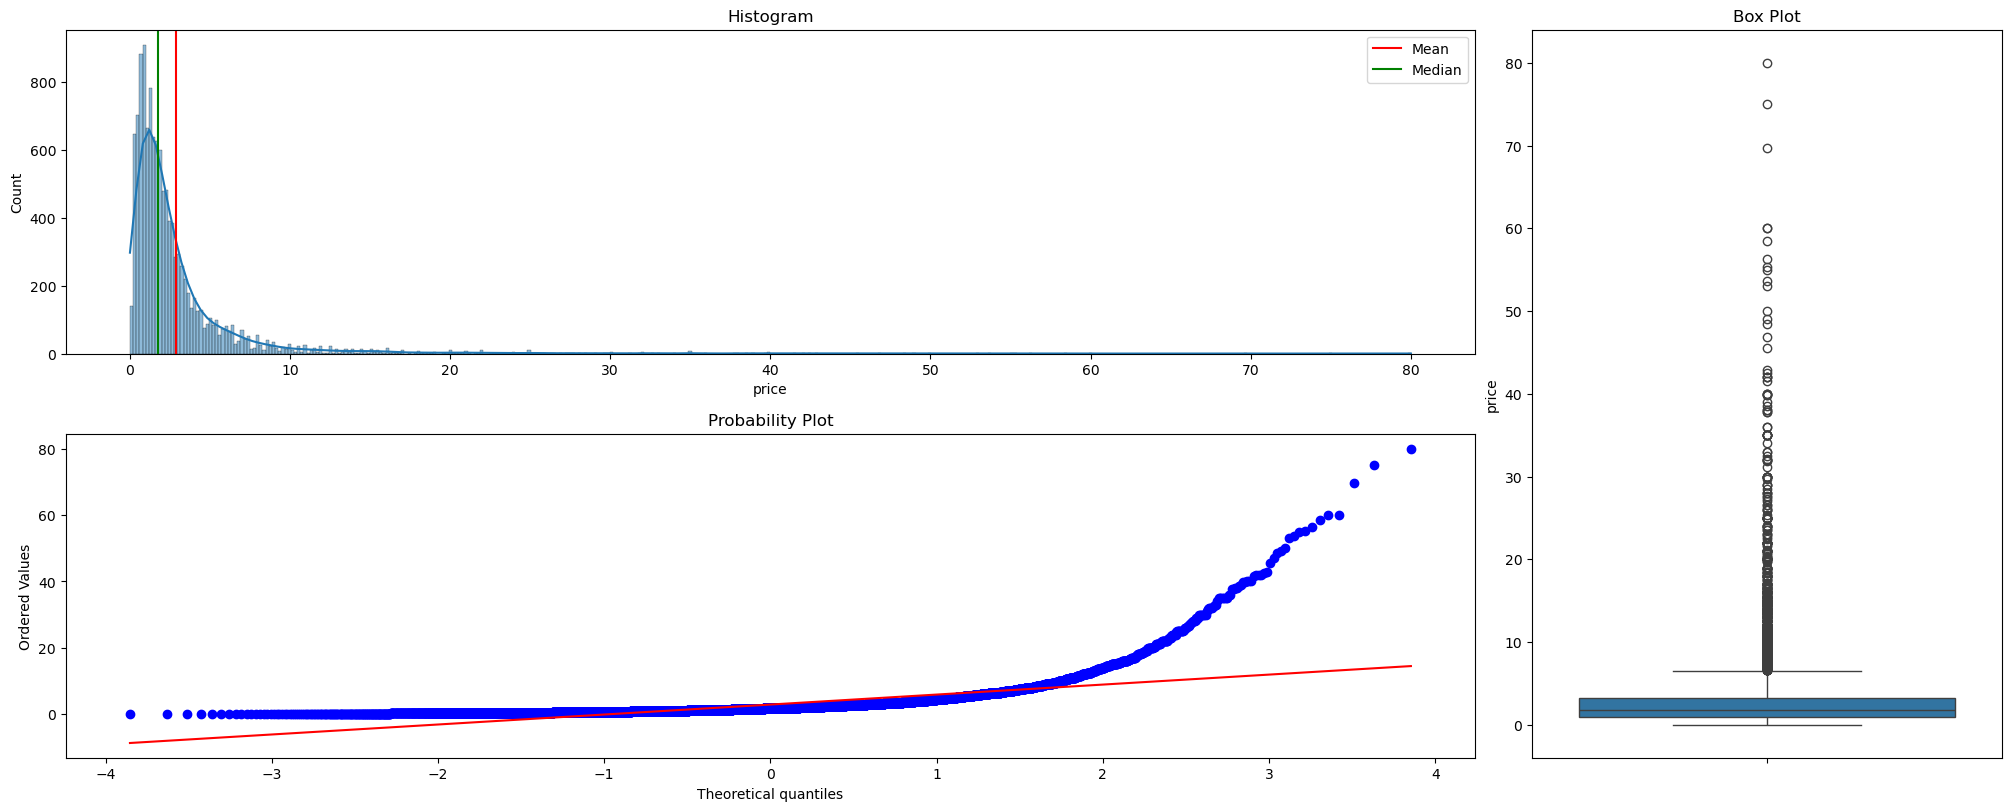

In [19]:
num_three_chart_plot(df, 'price')

In [20]:
quantiles_input = [0.01, 0.05, 0.95, 0.99]  
analyze_distribution(df, 'price', quantiles_input)

skewness : 6.197296
kurtosis : 60.929913
--------------------------------------------------------------------
Q1 (25th percentile): 0.9500
Q3 (75th percentile): 3.2000
IQR: 2.2500
Lower bound: -2.4250
Upper bound: 6.5750
--------------------------------------------------------------------
1th percentile   0.2000
5th percentile   0.3600
95th percentile   8.7500
99th percentile   21.0000


# Univariate analysis on Numerical columns

In [21]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['available_units', 'towers', 'locality_rank', 'locality_rating', 'bath',
       'parking', 'price', 'area', 'costpersqft', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'bed', 'lattitude', 'longitude',
       'assigned_amenities_score', 'emi', 'project_in_acres',
       'assigned_flooring_score'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 20


# available_units

In [22]:
# no of unique categories and value_counts
analyze_value_counts(df, 'available_units', top_n=5)  

Unique Categories in 'available_units': 589
--------------------------------------------------
available_units
1200.0    172
100.0     146
500.0     116
200.0     105
58.0      100
Name: count, dtype: int64


In [23]:
#missing values and describe
analyze_column(df, 'available_units')

Missing Values in 'available_units': 5226
--------------------------------------------------
count     6676.000000
mean       465.475584
std       1085.788012
min          6.000000
25%        120.000000
50%        282.000000
75%        550.000000
max      40000.000000
Name: available_units, dtype: float64


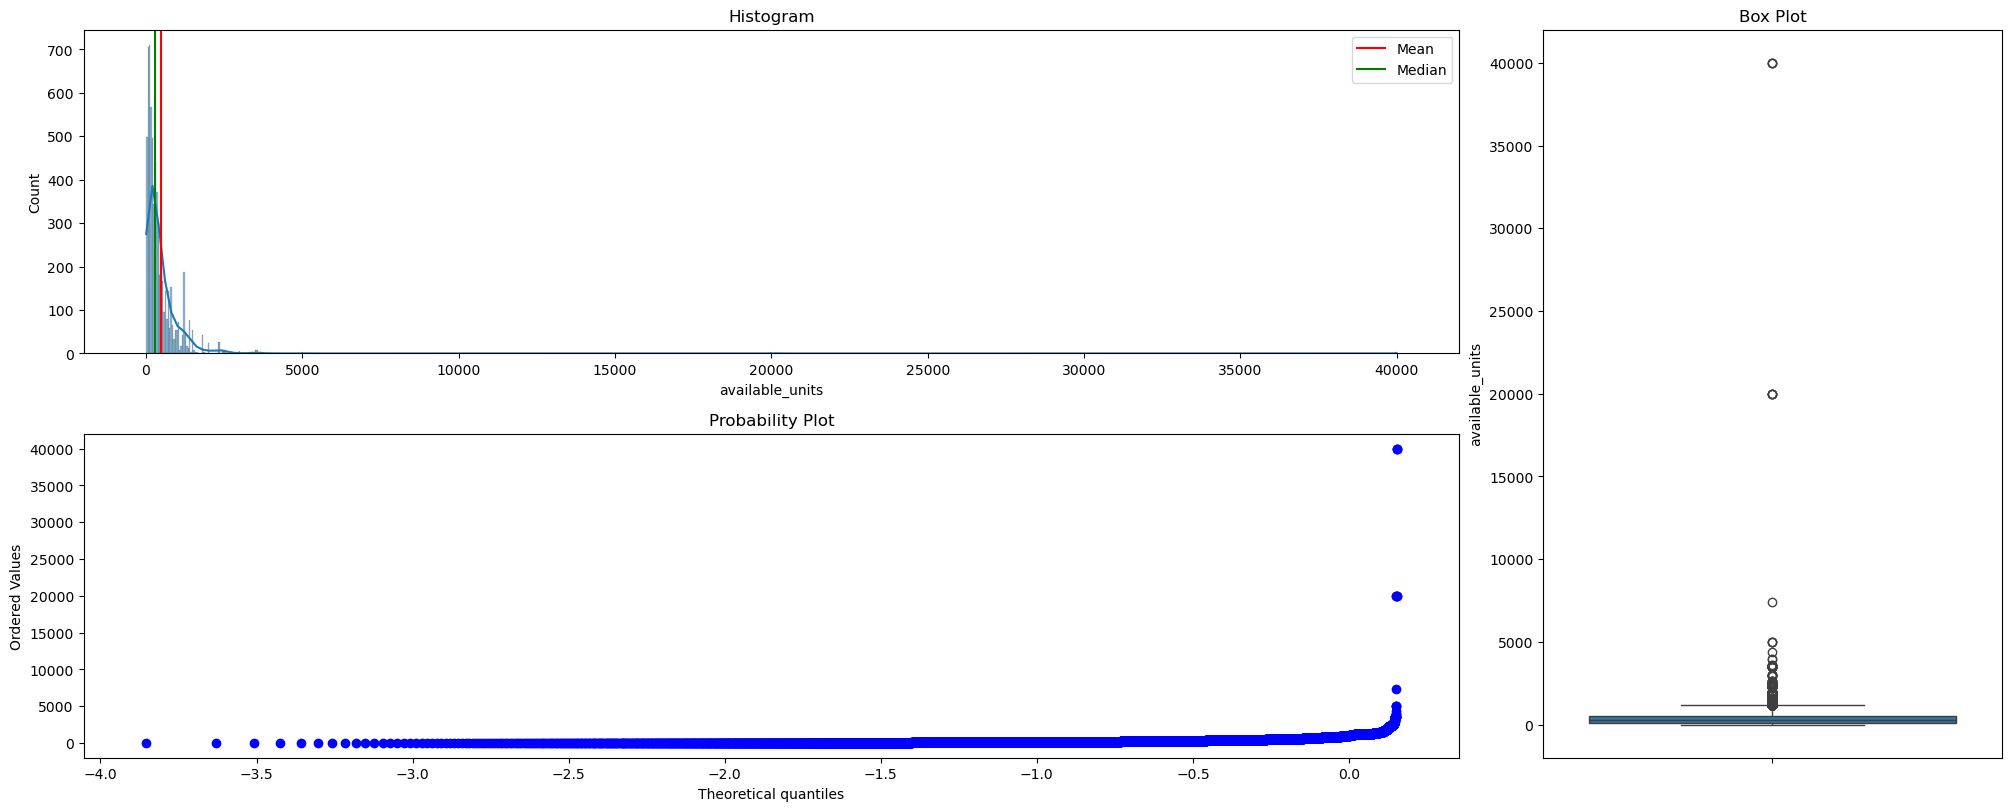

In [24]:
num_three_chart_plot(df, 'available_units')

In [25]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'available_units', quantiles_input)

skewness : 25.469442
kurtosis : 851.328151
--------------------------------------------------------------------
Q1 (25th percentile): 120.0000
Q3 (75th percentile): 550.0000
IQR: 430.0000
Lower bound: -525.0000
Upper bound: 1195.0000
--------------------------------------------------------------------
10th percentile   58.0000
75th percentile   550.0000


# towers

In [26]:
# no of unique categories and value_counts
analyze_value_counts(df, 'towers', top_n=5)  

Unique Categories in 'towers': 42
--------------------------------------------------
towers
1.0    1992
2.0    1193
3.0    1057
5.0     489
4.0     476
Name: count, dtype: int64


In [27]:
#missing values and describe
analyze_column(df, 'towers')

Missing Values in 'towers': 5034
--------------------------------------------------
count    6868.000000
mean        4.624199
std         6.940877
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       200.000000
Name: towers, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


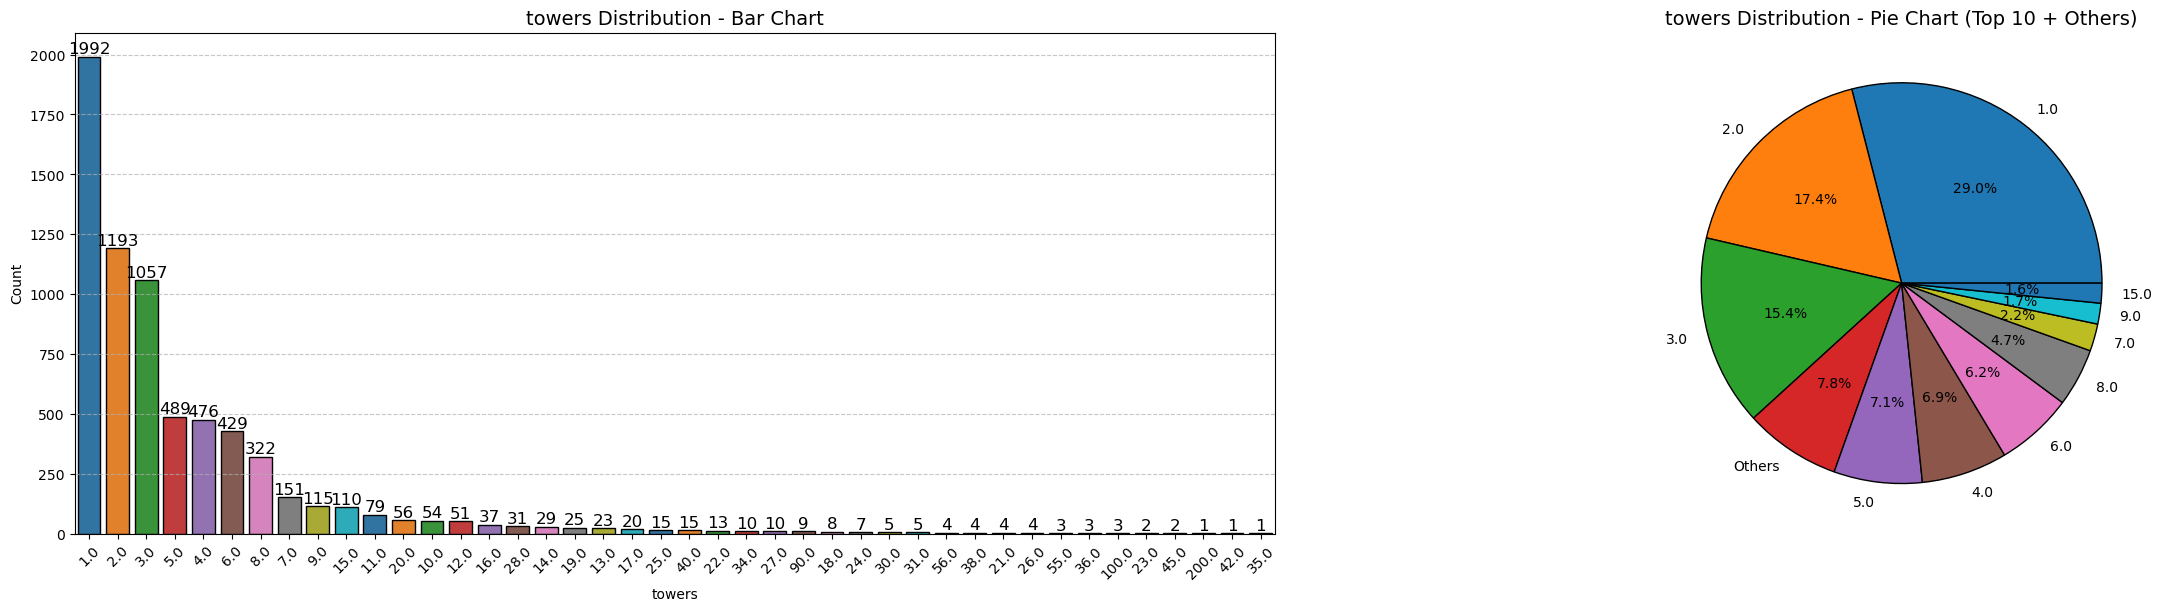

In [28]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'towers', top_n=10) 

In [29]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'towers',9, 0.90)

Top 9 cumulative values:
towers
1.0    0.290041
2.0    0.463745
3.0    0.617647
5.0    0.688847
4.0    0.758154
6.0    0.820617
8.0    0.867501
7.0    0.889487
9.0    0.906232
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 9 Properties below 90.0% percentile: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


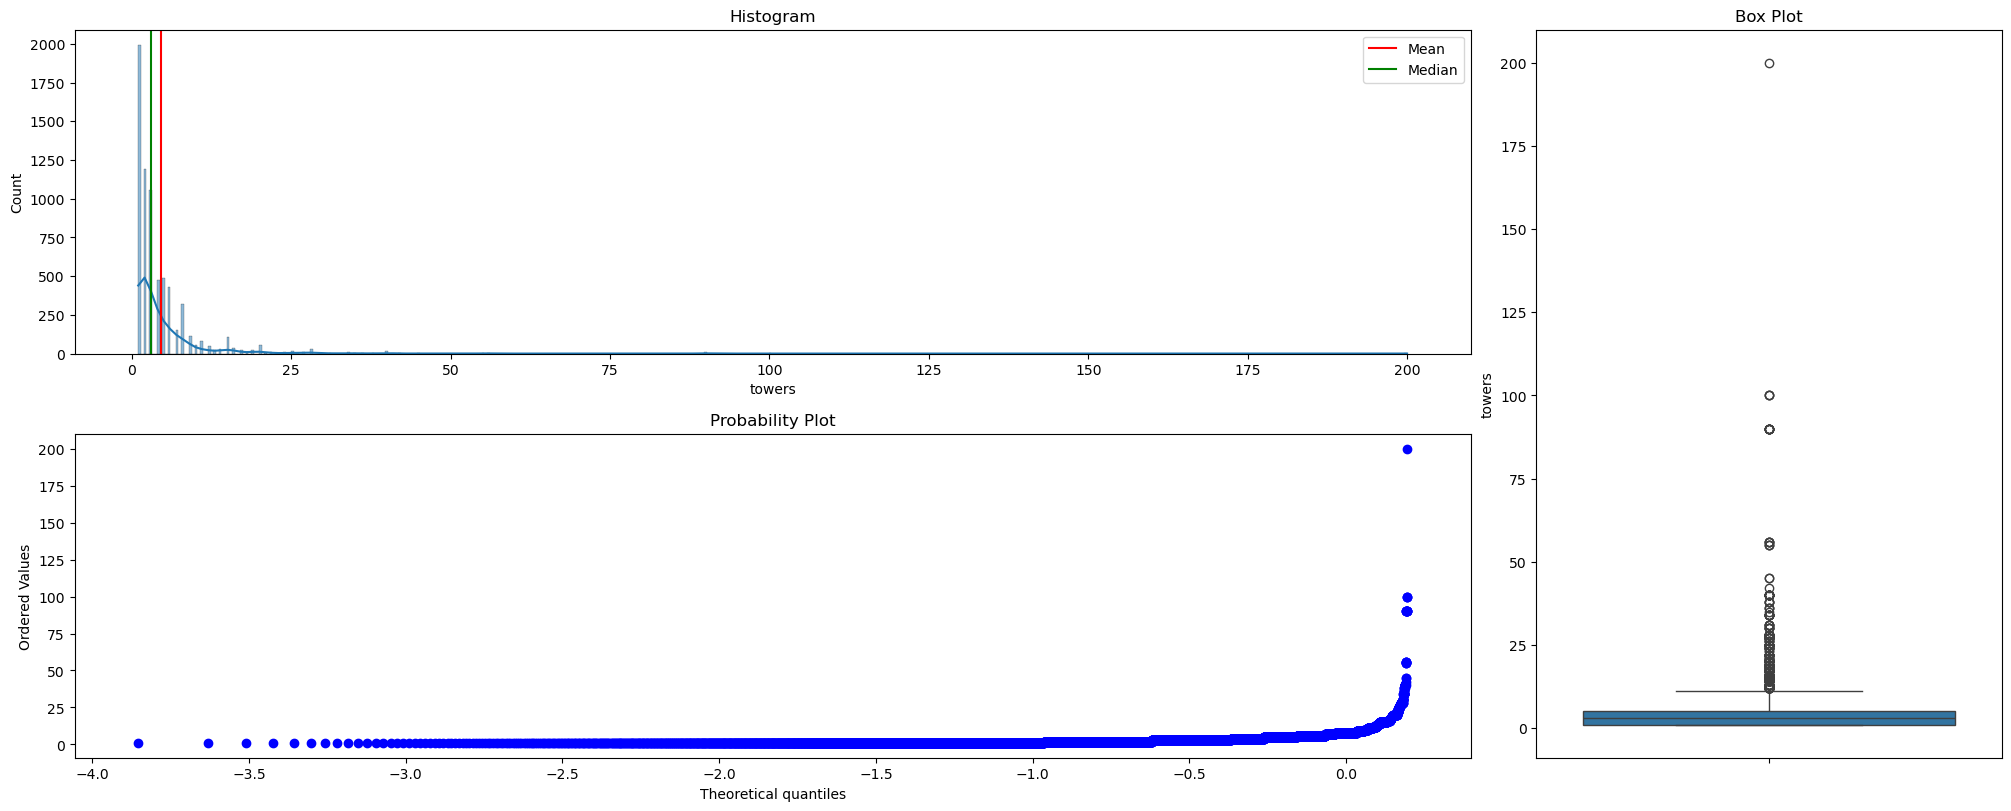

In [30]:
num_three_chart_plot(df, 'towers')

In [31]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'towers', quantiles_input)

skewness : 8.476354
kurtosis : 141.936226
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 5.0000
IQR: 4.0000
Lower bound: -5.0000
Upper bound: 11.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   5.0000


# locality_rank

In [32]:
# no of unique categories and value_counts
analyze_value_counts(df, 'locality_rank', top_n=5)  

Unique Categories in 'locality_rank': 179
--------------------------------------------------
locality_rank
186.0    412
4.0      372
46.0     336
8.0      301
155.0    291
Name: count, dtype: int64


In [33]:
#missing values and describe
analyze_column(df, 'locality_rank')

Missing Values in 'locality_rank': 3839
--------------------------------------------------
count    8063.000000
mean      122.406424
std       126.565803
min         1.000000
25%        16.000000
50%        92.000000
75%       186.000000
max       839.000000
Name: locality_rank, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


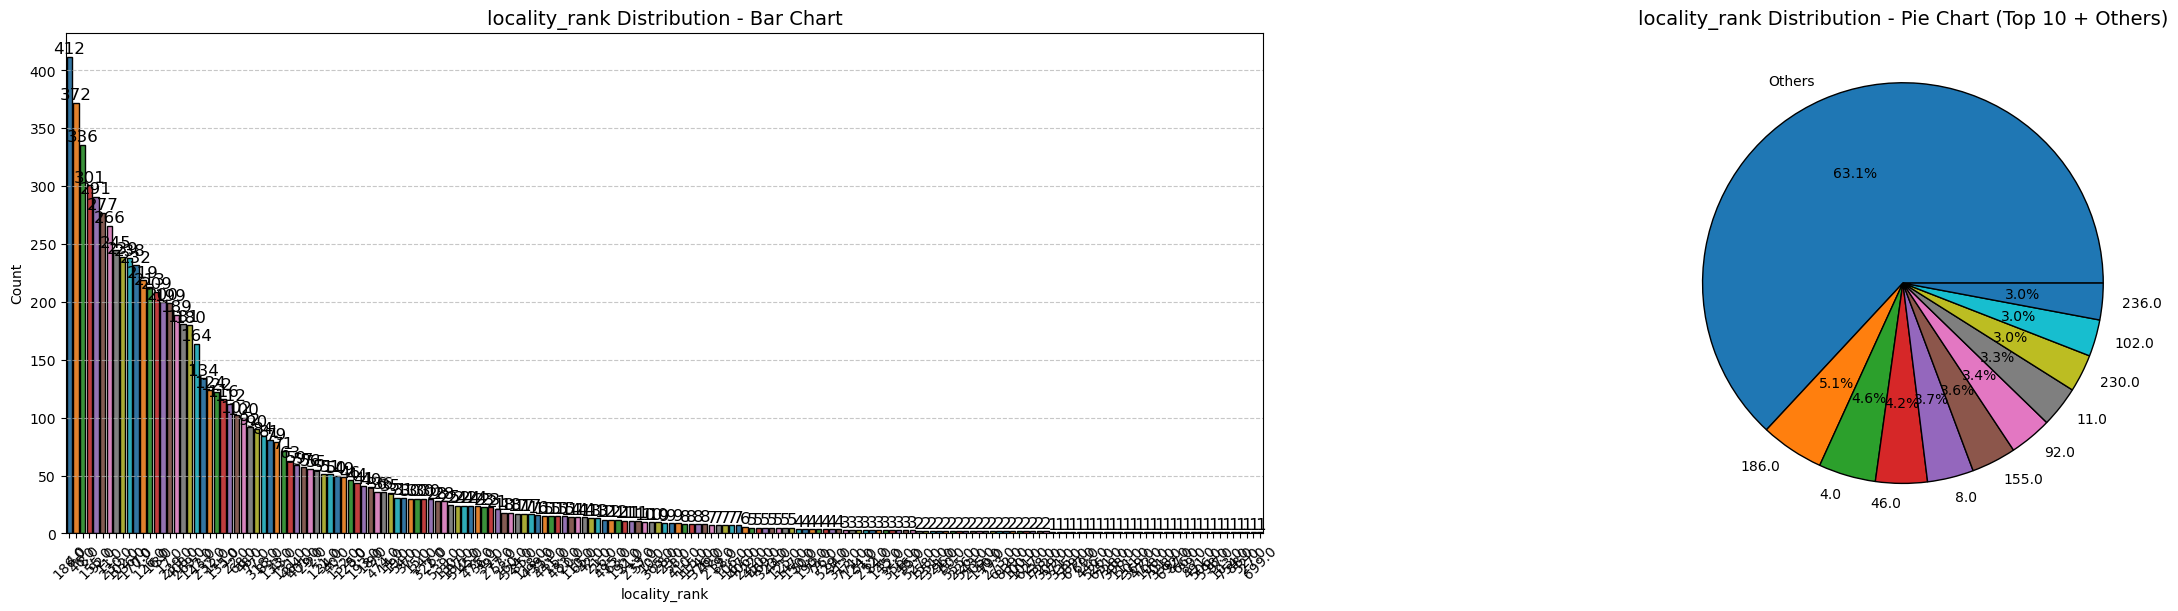

In [34]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'locality_rank', top_n=10) 

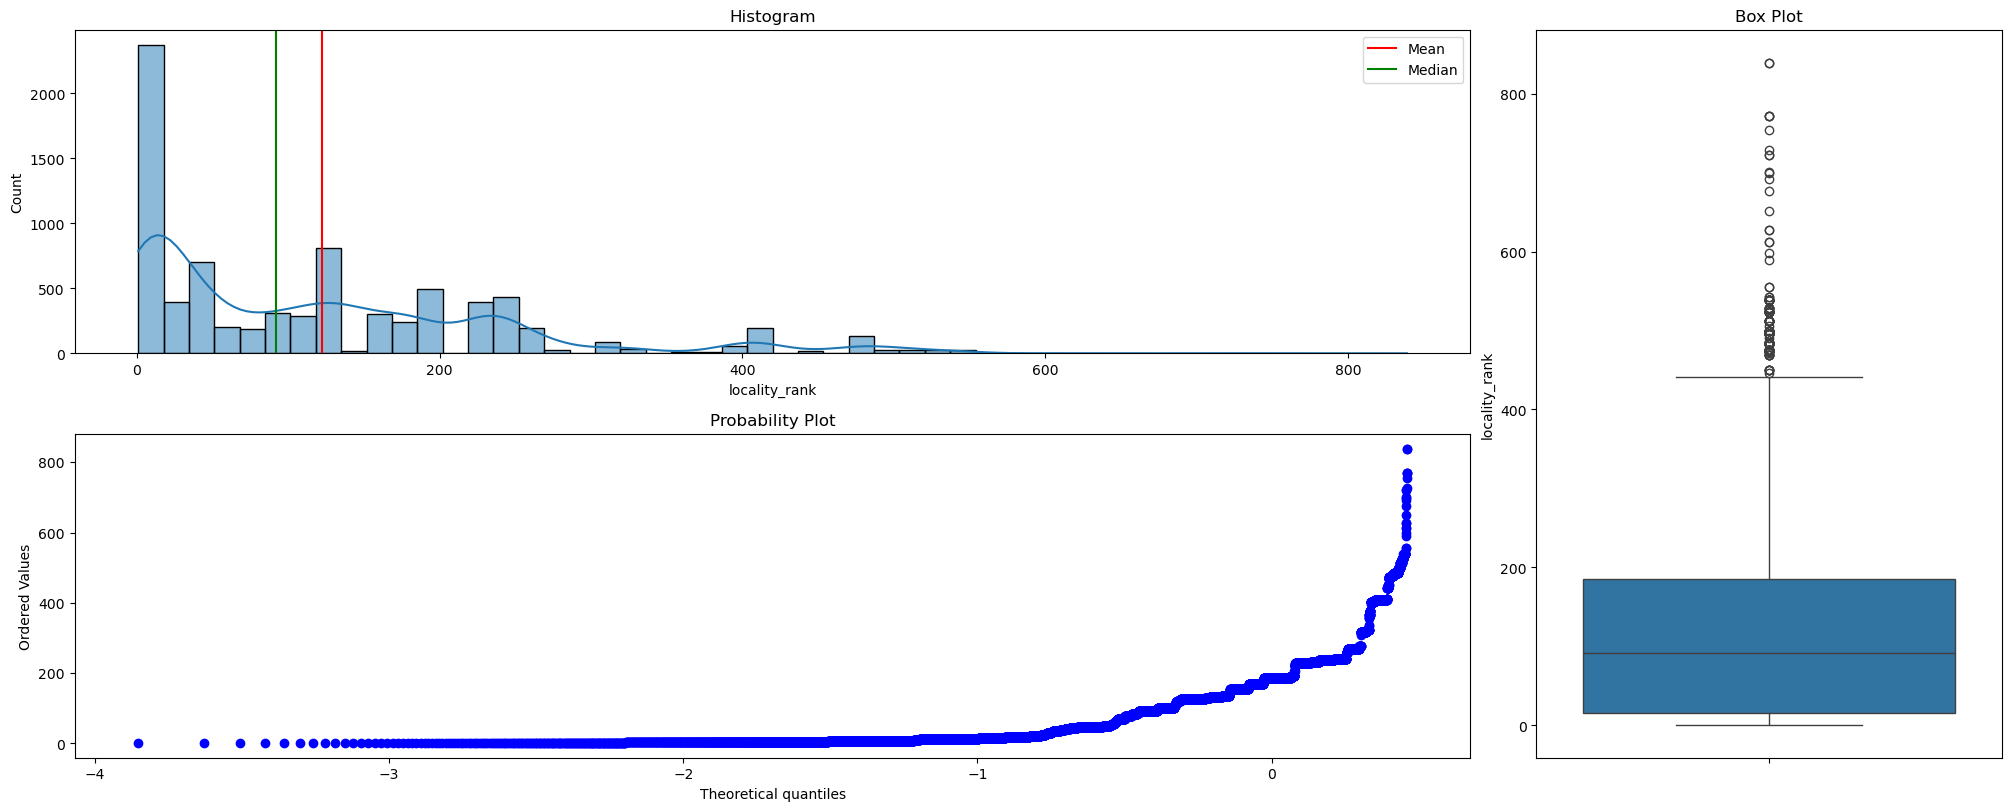

In [35]:
num_three_chart_plot(df, 'locality_rank')

In [36]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'locality_rank', quantiles_input)

skewness : 1.399060
kurtosis : 1.997224
--------------------------------------------------------------------
Q1 (25th percentile): 16.0000
Q3 (75th percentile): 186.0000
IQR: 170.0000
Lower bound: -239.0000
Upper bound: 441.0000
--------------------------------------------------------------------
10th percentile   6.0000
75th percentile   186.0000


# locality_rating

In [37]:
# no of unique categories and value_counts
analyze_value_counts(df, 'locality_rating', top_n=5)  

Unique Categories in 'locality_rating': 26
--------------------------------------------------
locality_rating
4.1    2022
4.0    1953
3.9    1535
4.2    1366
3.8    1128
Name: count, dtype: int64


In [38]:
#missing values and describe
analyze_column(df, 'locality_rating')

Missing Values in 'locality_rating': 467
--------------------------------------------------
count    11435.000000
mean         3.759405
std          1.067471
min          0.000000
25%          3.900000
50%          4.000000
75%          4.200000
max          5.000000
Name: locality_rating, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


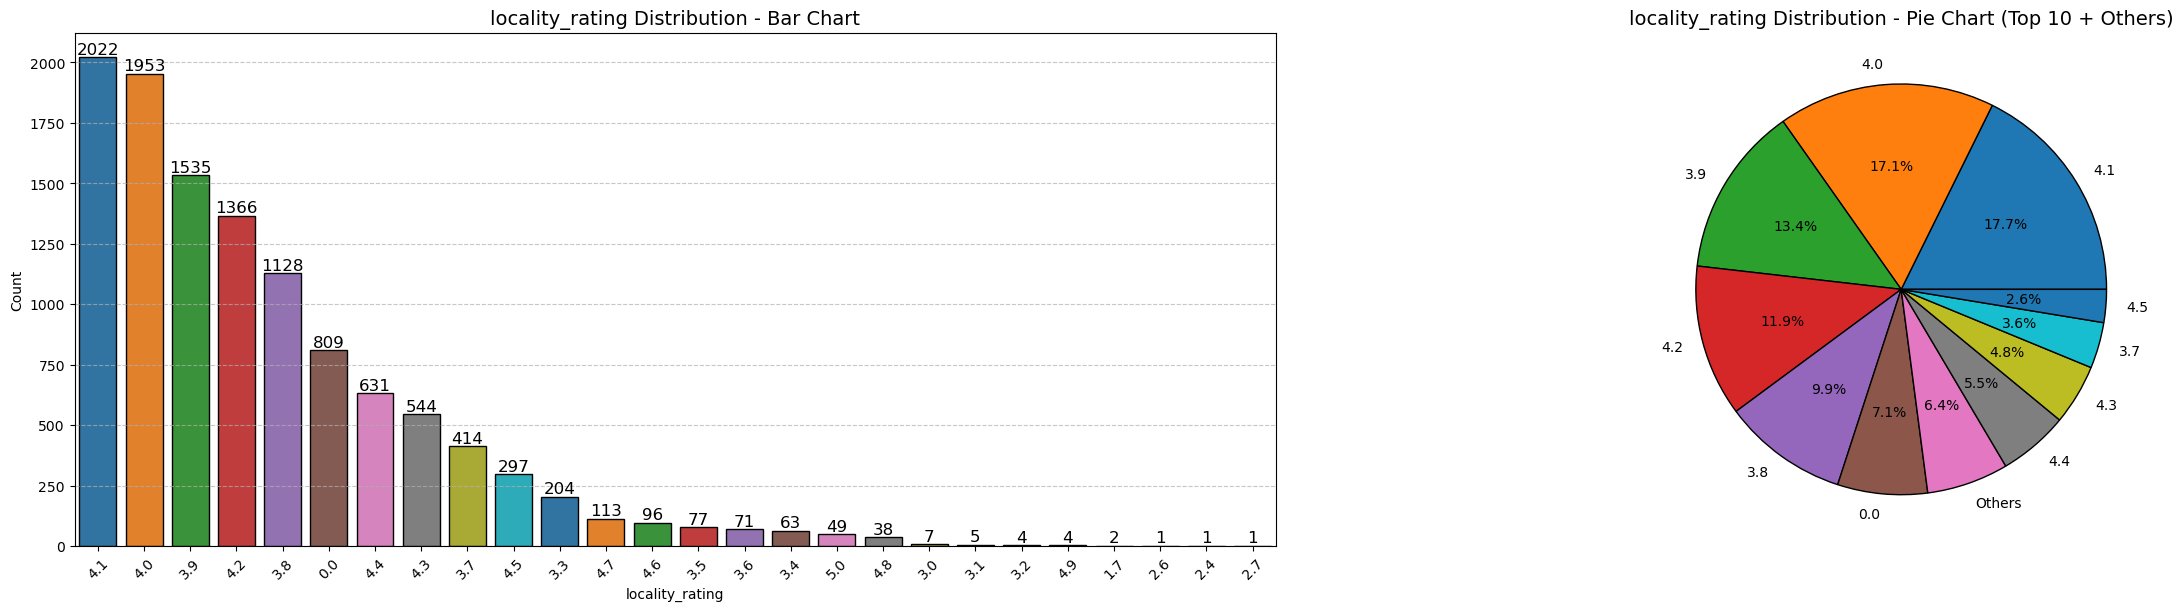

In [39]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'locality_rating', top_n=10) 

In [40]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'locality_rating',9, 0.90)

Top 9 cumulative values:
locality_rating
4.1    0.176826
4.0    0.347617
3.9    0.481854
4.2    0.601312
3.8    0.699956
0.0    0.770704
4.4    0.825885
4.3    0.873459
3.7    0.909663
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 9 Properties below 90.0% percentile: [0.0, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]


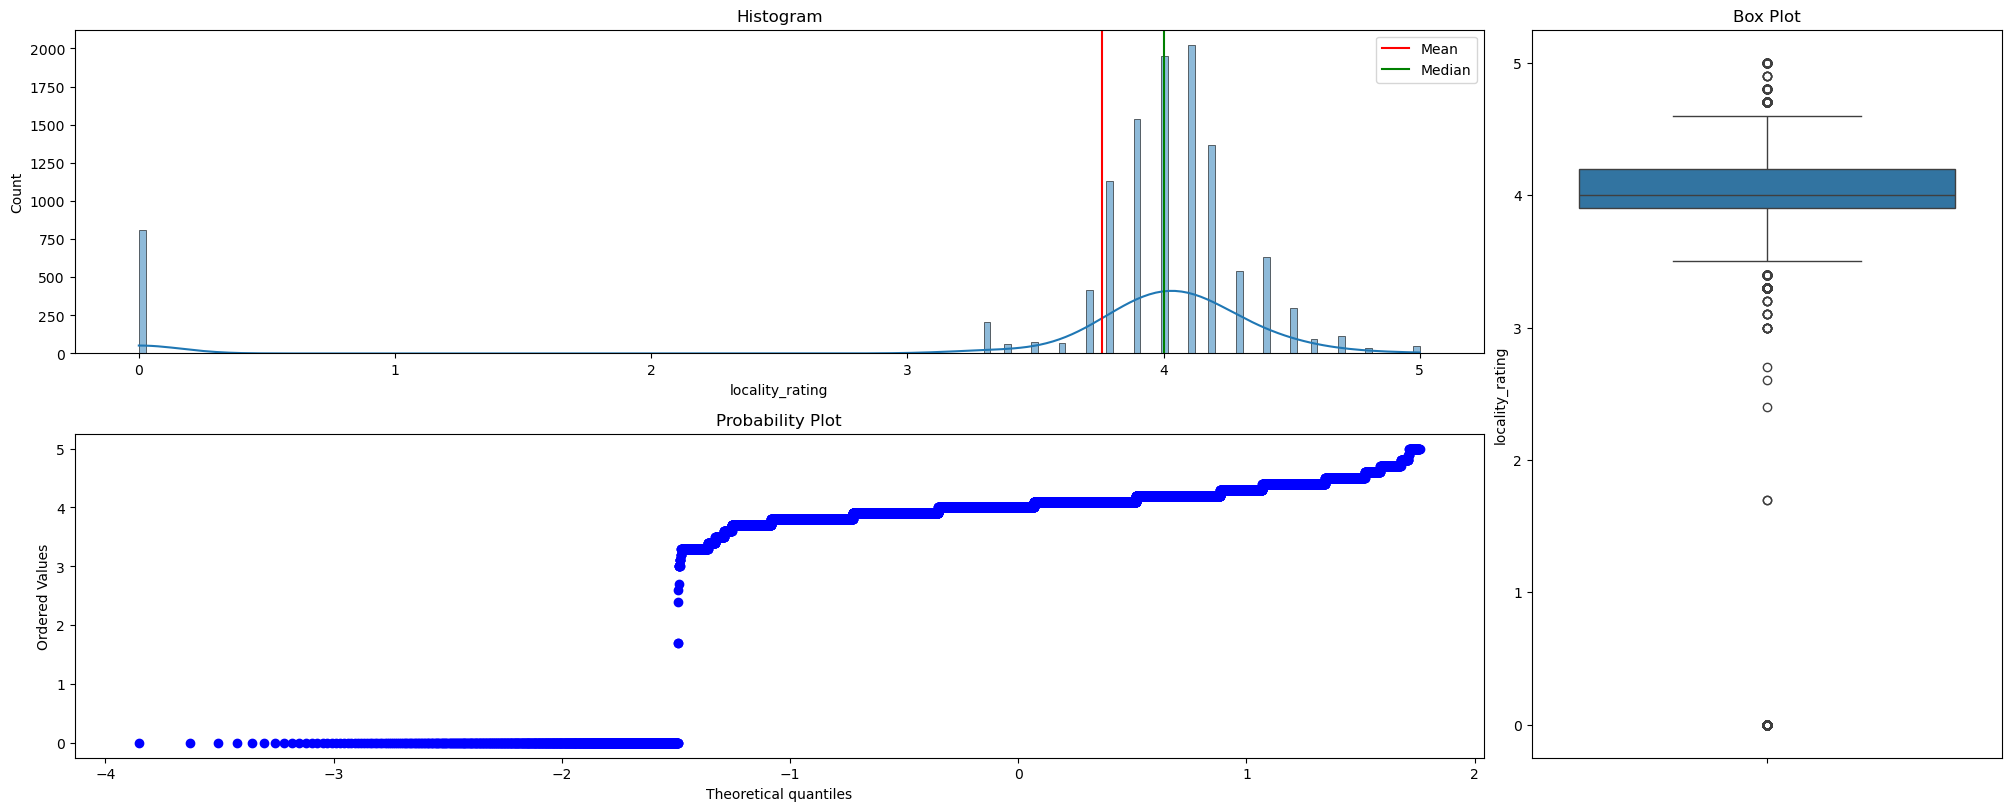

In [41]:
num_three_chart_plot(df, 'locality_rating')

In [42]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'locality_rating', quantiles_input)

skewness : -3.030586
kurtosis : 7.935670
--------------------------------------------------------------------
Q1 (25th percentile): 3.9000
Q3 (75th percentile): 4.2000
IQR: 0.3000
Lower bound: 3.4500
Upper bound: 4.6500
--------------------------------------------------------------------
10th percentile   3.5000
75th percentile   4.2000


# bath

In [43]:
# no of unique categories and value_counts
analyze_value_counts(df, 'bath', top_n=5)  

Unique Categories in 'bath': 10
--------------------------------------------------
bath
2.0    6561
3.0    2485
1.0    1653
4.0     781
5.0     278
Name: count, dtype: int64


In [44]:
#missing values and describe
analyze_column(df, 'bath')

Missing Values in 'bath': 30
--------------------------------------------------
count    11872.000000
mean         2.315027
std          0.963394
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bath, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


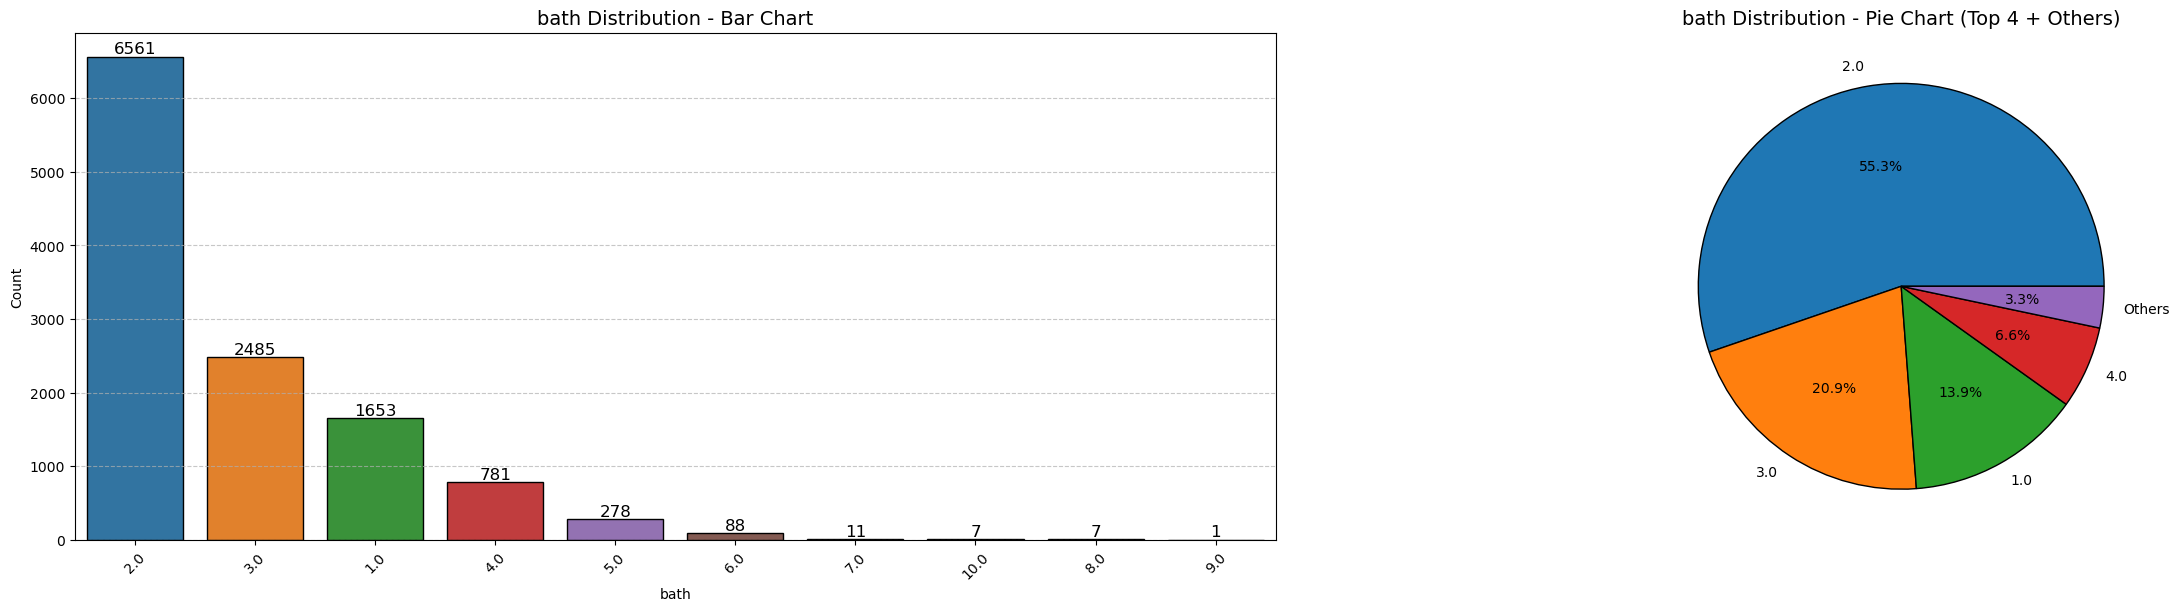

In [165]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bath', top_n=4) 

In [46]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'bath',10, 0.90)

Top 10 cumulative values:
bath
2.0     0.552645
3.0     0.761961
1.0     0.901196
4.0     0.966981
5.0     0.990398
6.0     0.997810
7.0     0.998737
10.0    0.999326
8.0     0.999916
9.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


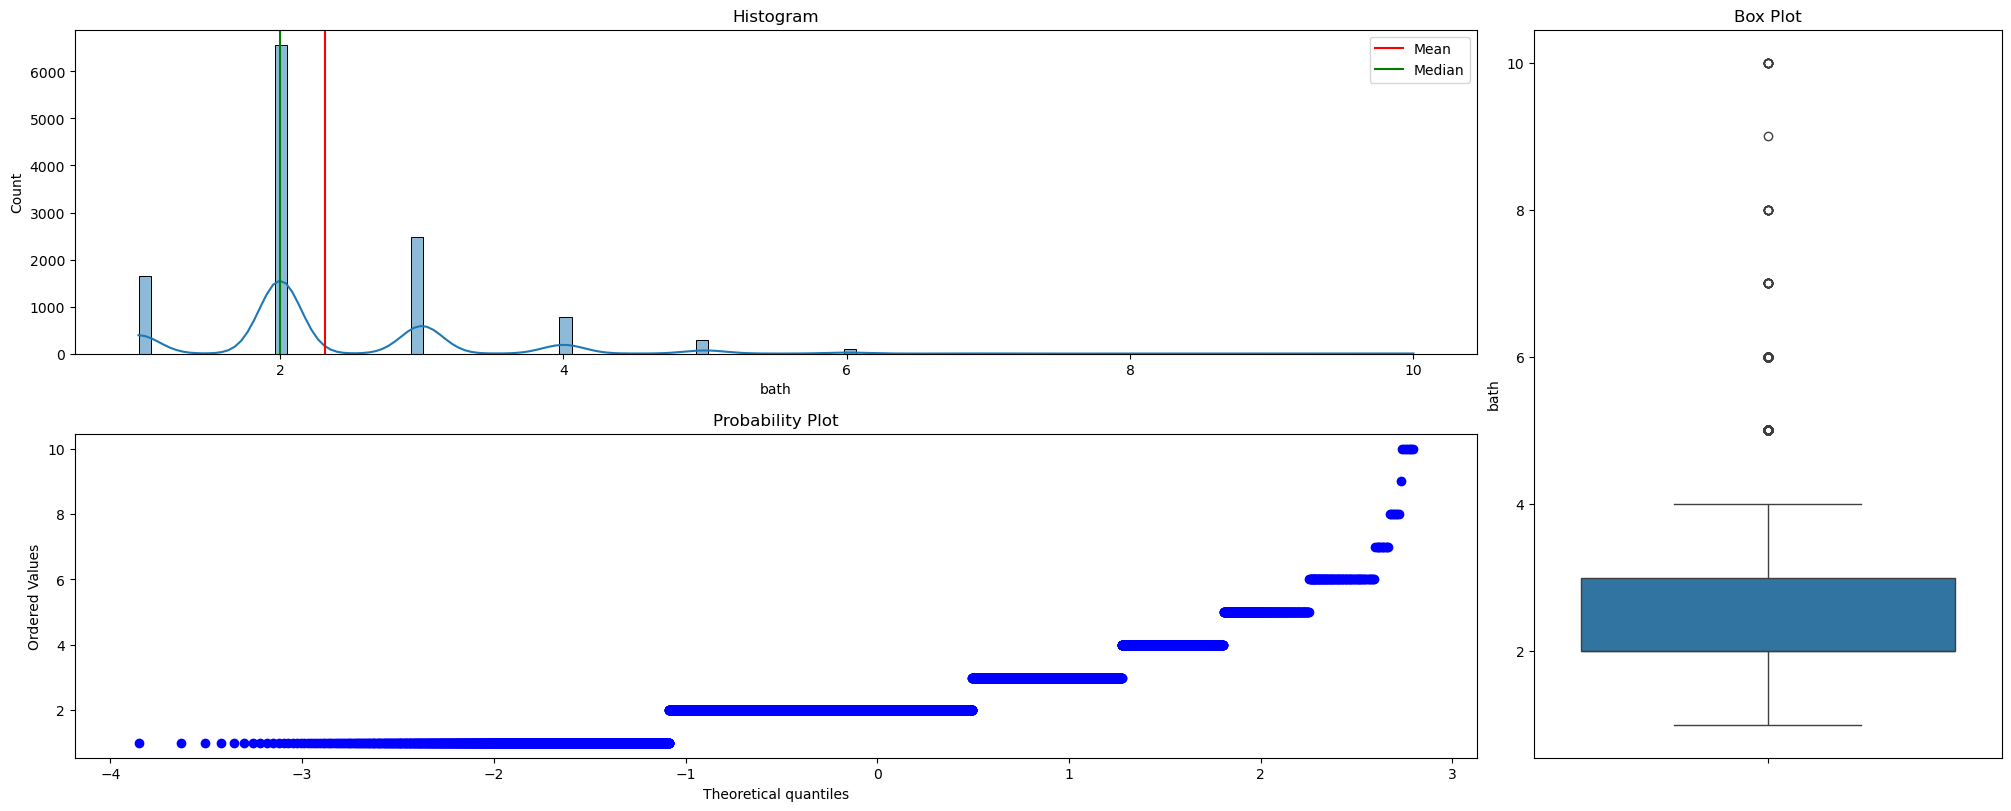

In [47]:
num_three_chart_plot(df, 'bath')

In [48]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'bath', quantiles_input)

skewness : 1.531009
kurtosis : 4.977922
--------------------------------------------------------------------
Q1 (25th percentile): 2.0000
Q3 (75th percentile): 3.0000
IQR: 1.0000
Lower bound: 0.5000
Upper bound: 4.5000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


# parking

In [49]:
# no of unique categories and value_counts
analyze_value_counts(df, 'parking', top_n=5)  

Unique Categories in 'parking': 10
--------------------------------------------------
parking
1.0    3959
2.0    1350
3.0     243
4.0      82
5.0      17
Name: count, dtype: int64


In [50]:
#missing values and describe
analyze_column(df, 'parking')

Missing Values in 'parking': 6240
--------------------------------------------------
count    5662.000000
mean        1.392088
std         0.722071
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: parking, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


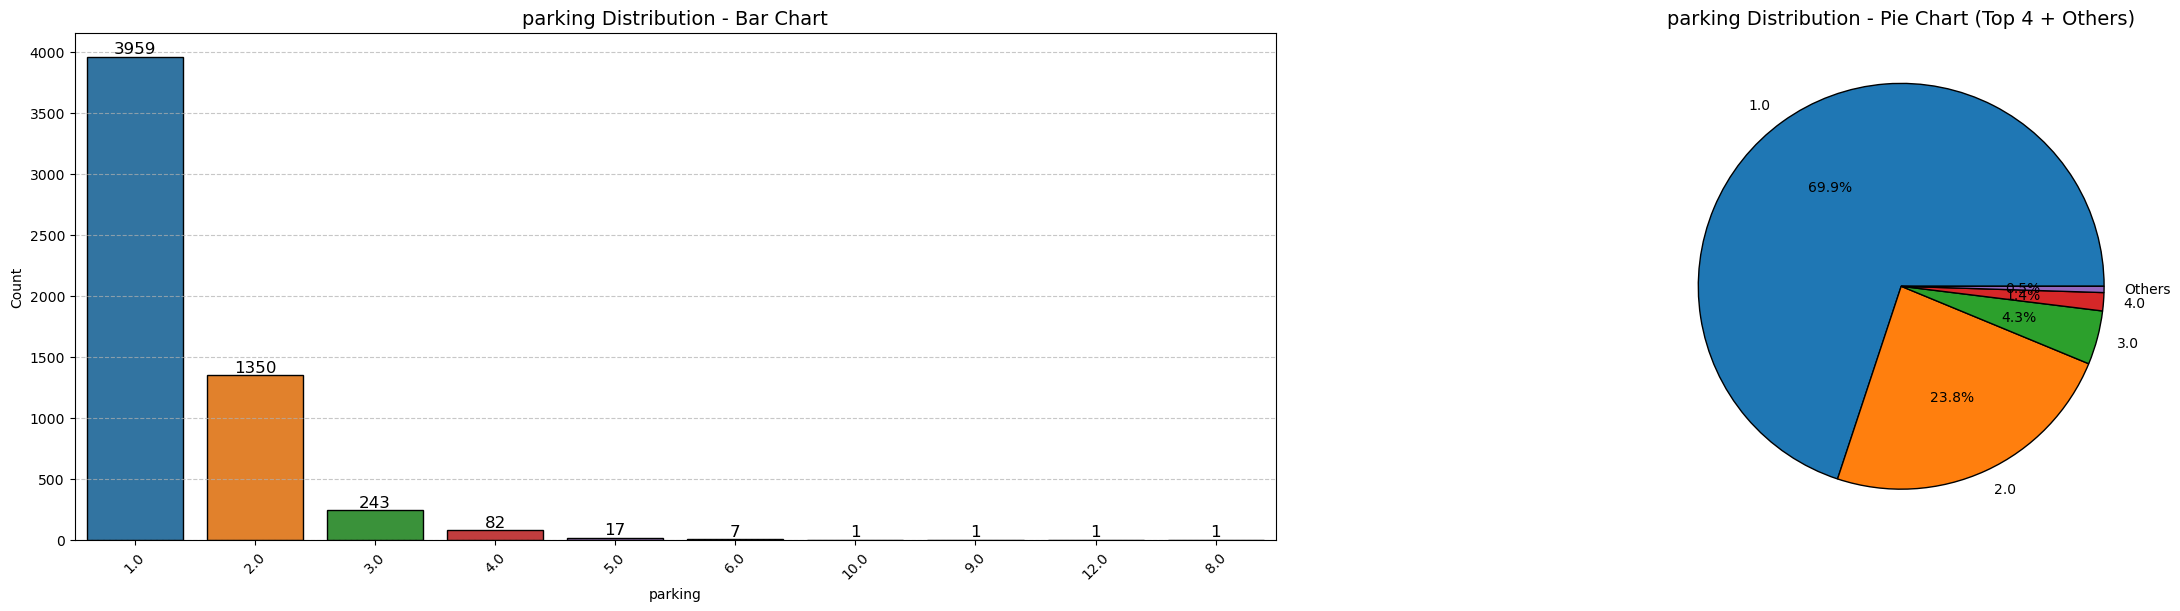

In [51]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'parking', top_n=4) 

In [52]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'parking',10, 0.90)

Top 10 cumulative values:
parking
1.0     0.699223
2.0     0.937655
3.0     0.980572
4.0     0.995055
5.0     0.998057
6.0     0.999294
10.0    0.999470
9.0     0.999647
12.0    0.999823
8.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: [1.0, 2.0]


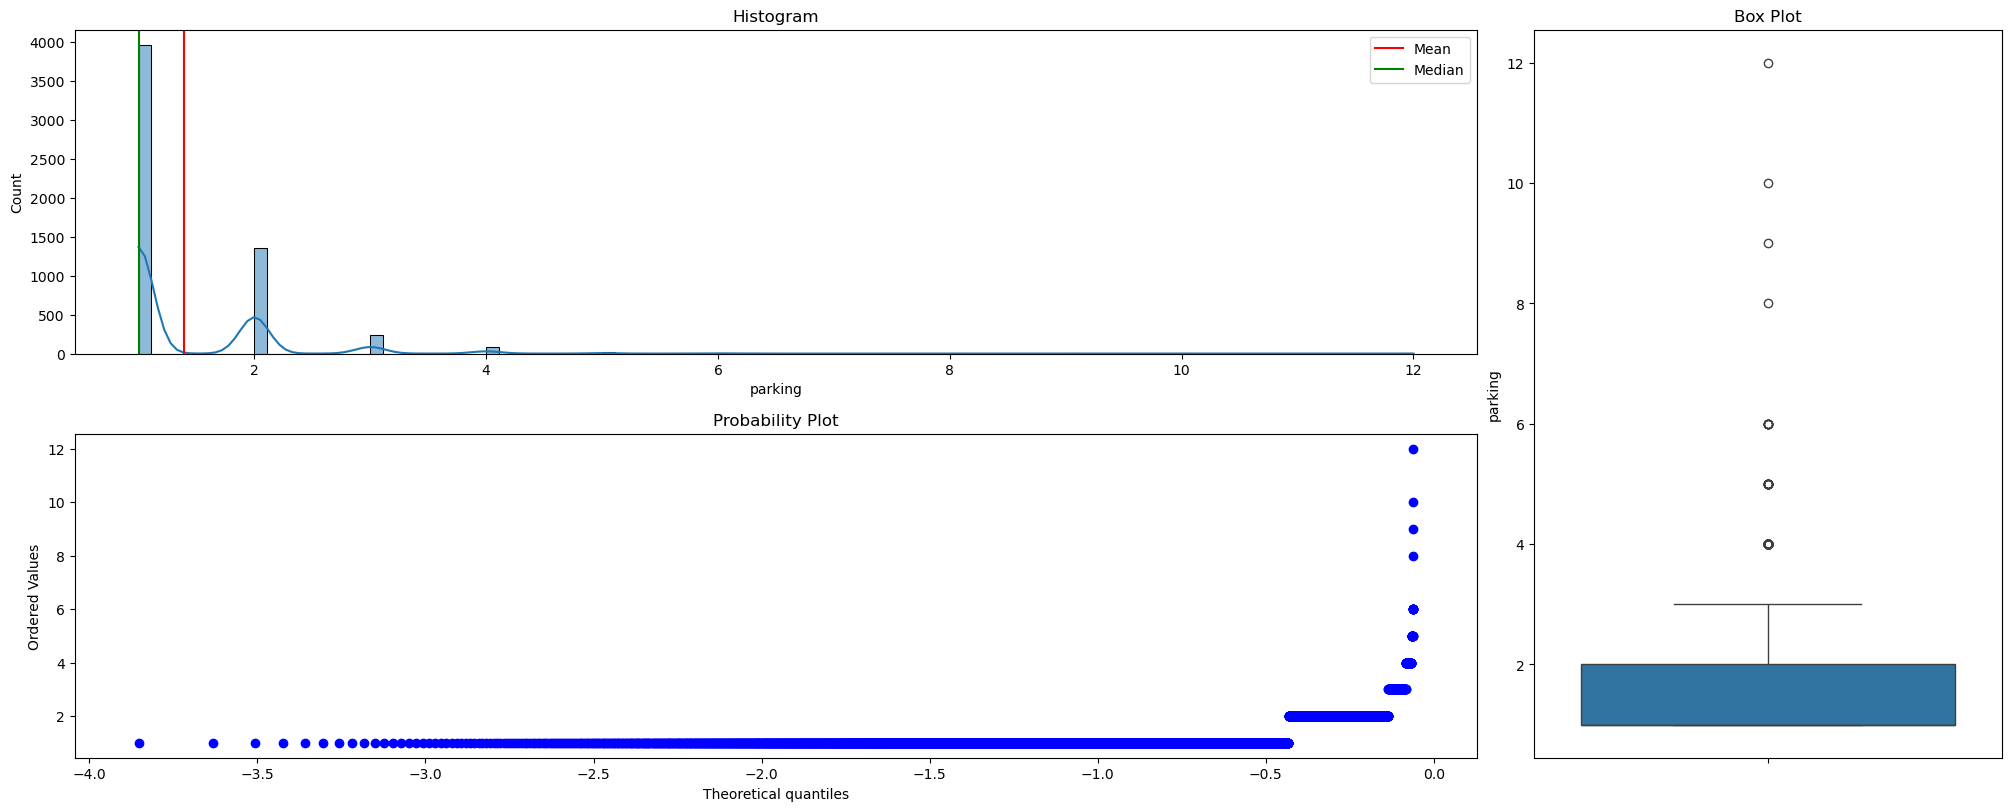

In [53]:
num_three_chart_plot(df, 'parking')

In [54]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'parking', quantiles_input)

skewness : 3.085163
kurtosis : 19.857743
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 2.0000
IQR: 1.0000
Lower bound: -0.5000
Upper bound: 3.5000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   2.0000


# area

In [55]:
# no of unique categories and value_counts
analyze_value_counts(df, 'area', top_n=5)  

Unique Categories in 'area': 1527
--------------------------------------------------
area
650.0    225
750.0    208
450.0    186
700.0    175
400.0    144
Name: count, dtype: int64


In [56]:
#missing values and describe
analyze_column(df, 'area')

Missing Values in 'area': 5
--------------------------------------------------
count    11897.000000
mean       879.253257
std        697.368865
min          3.000000
25%        540.000000
50%        730.000000
75%       1036.000000
max      40852.000000
Name: area, dtype: float64


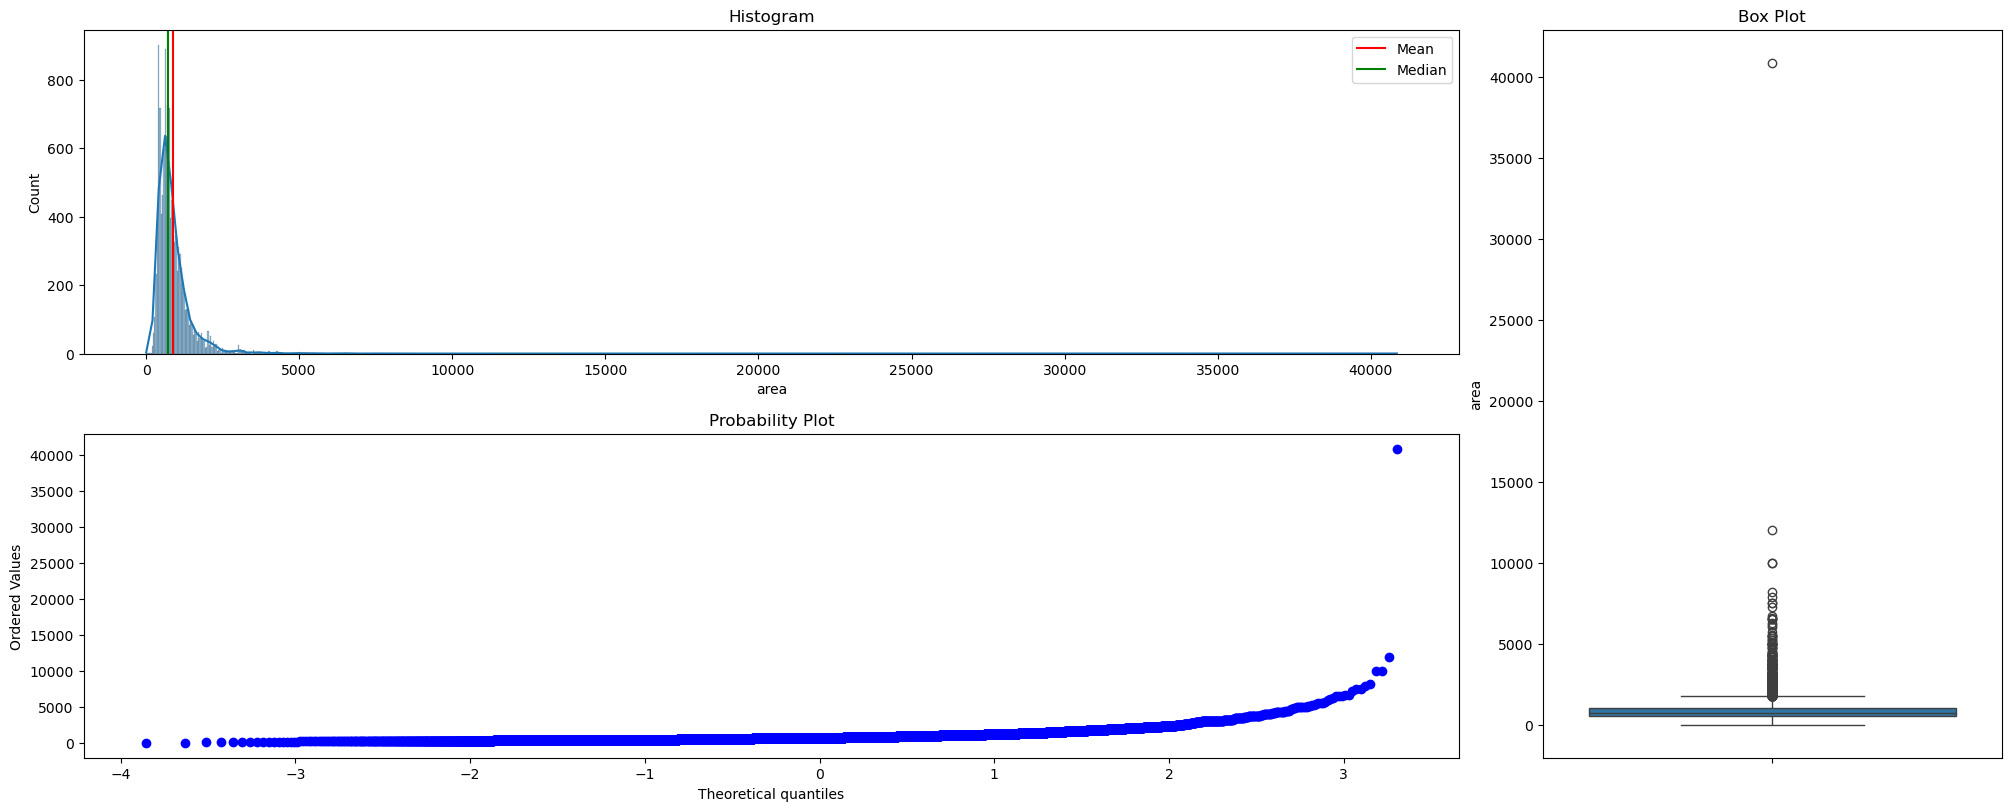

In [57]:
num_three_chart_plot(df, 'area')

In [58]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'area', quantiles_input)

skewness : 18.544610
kurtosis : 927.313065
--------------------------------------------------------------------
Q1 (25th percentile): 540.0000
Q3 (75th percentile): 1036.0000
IQR: 496.0000
Lower bound: -204.0000
Upper bound: 1780.0000
--------------------------------------------------------------------
10th percentile   413.0000
75th percentile   1036.0000


# costpersqft

In [59]:
# no of unique categories and value_counts
analyze_value_counts(df, 'costpersqft', top_n=5)  

Unique Categories in 'costpersqft': 7500
--------------------------------------------------
costpersqft
25000.0    64
20000.0    60
30000.0    47
33333.0    36
26667.0    35
Name: count, dtype: int64


In [60]:
#missing values and describe
analyze_column(df, 'costpersqft')

Missing Values in 'costpersqft': 6
--------------------------------------------------
count    1.189600e+04
mean     2.826344e+04
std      5.139257e+04
min      1.470000e+02
25%      1.690925e+04
50%      2.557700e+04
75%      3.428600e+04
max      5.333333e+06
Name: costpersqft, dtype: float64


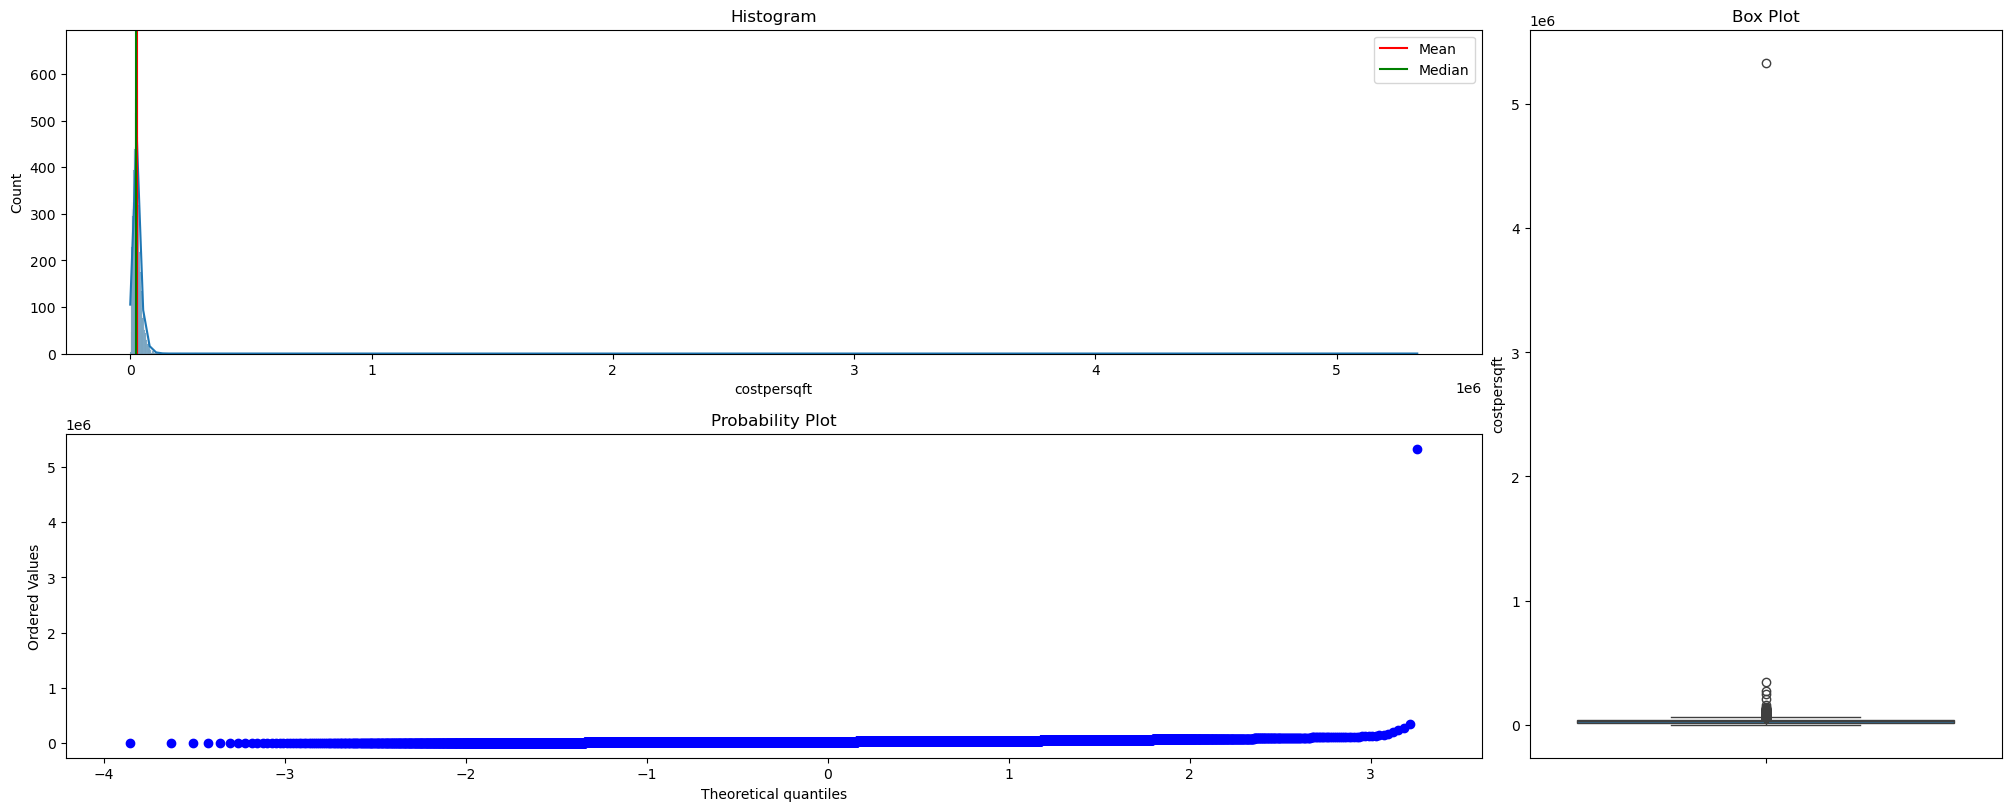

In [61]:
num_three_chart_plot(df, 'costpersqft')

In [62]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'costpersqft', quantiles_input)

skewness : 92.565040
kurtosis : 9547.573947
--------------------------------------------------------------------
Q1 (25th percentile): 16909.2500
Q3 (75th percentile): 34286.0000
IQR: 17376.7500
Lower bound: -9155.8750
Upper bound: 60351.1250
--------------------------------------------------------------------
10th percentile   9877.5000
75th percentile   34286.0000


# lift

In [63]:
# no of unique categories and value_counts
analyze_value_counts(df, 'lift', top_n=5)  

Unique Categories in 'lift': 10
--------------------------------------------------
lift
2.0    2387
3.0    1333
4.0    1138
1.0     619
5.0     385
Name: count, dtype: int64


In [64]:
#missing values and describe
analyze_column(df, 'lift')

Missing Values in 'lift': 5447
--------------------------------------------------
count    6455.000000
mean        3.116809
std         1.714334
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: lift, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


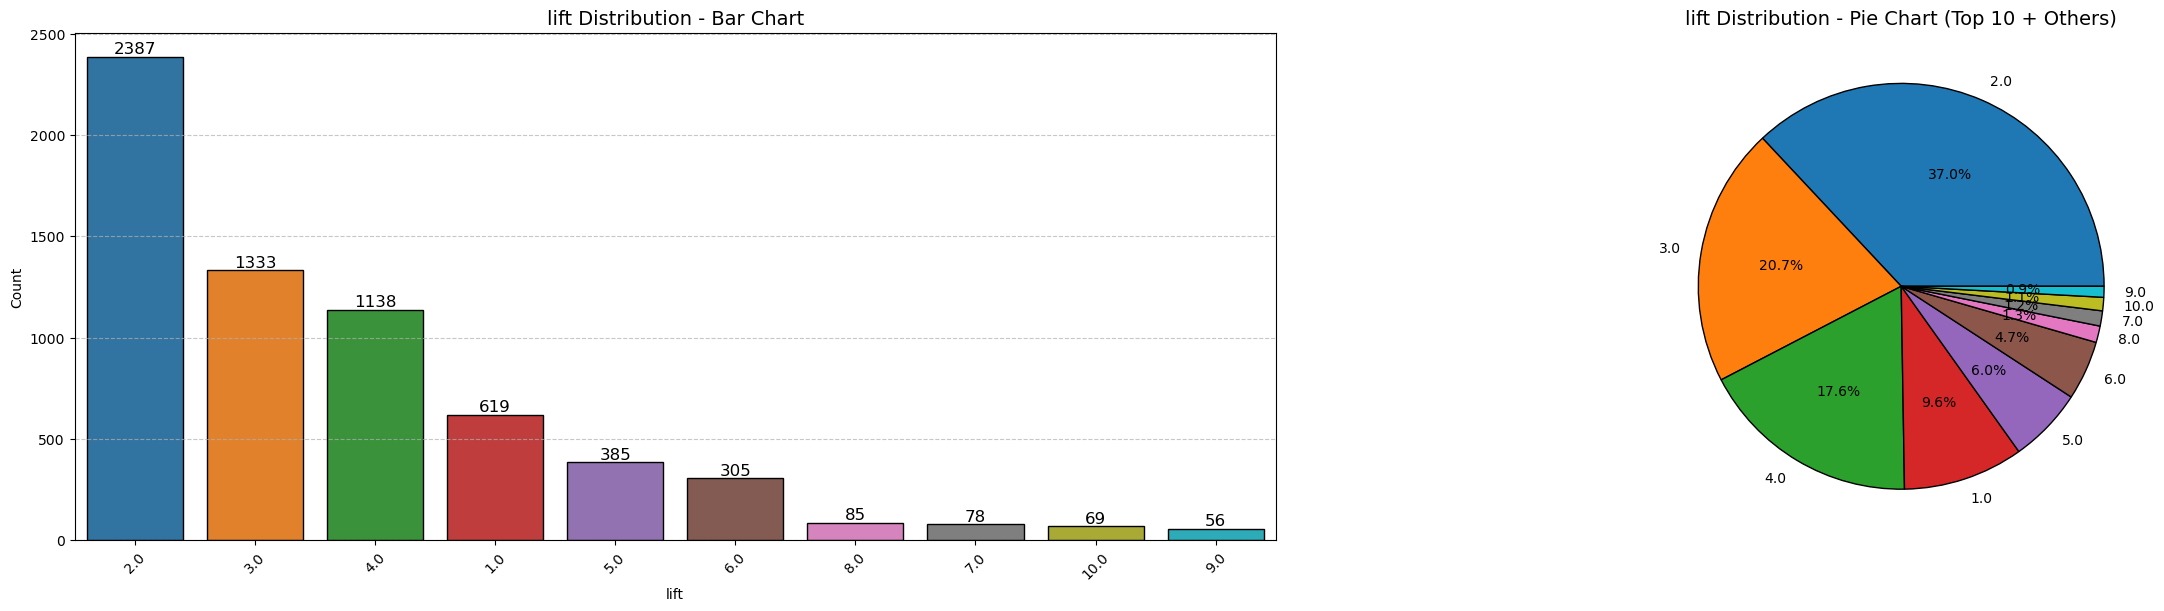

In [65]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'lift', top_n=10) 

In [66]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'lift',10, 0.90)

Top 10 cumulative values:
lift
2.0     0.369791
3.0     0.576297
4.0     0.752595
1.0     0.848490
5.0     0.908133
6.0     0.955383
8.0     0.968552
7.0     0.980635
10.0    0.991325
9.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 5 Properties below 90.0% percentile: [1.0, 2.0, 3.0, 4.0, 5.0]


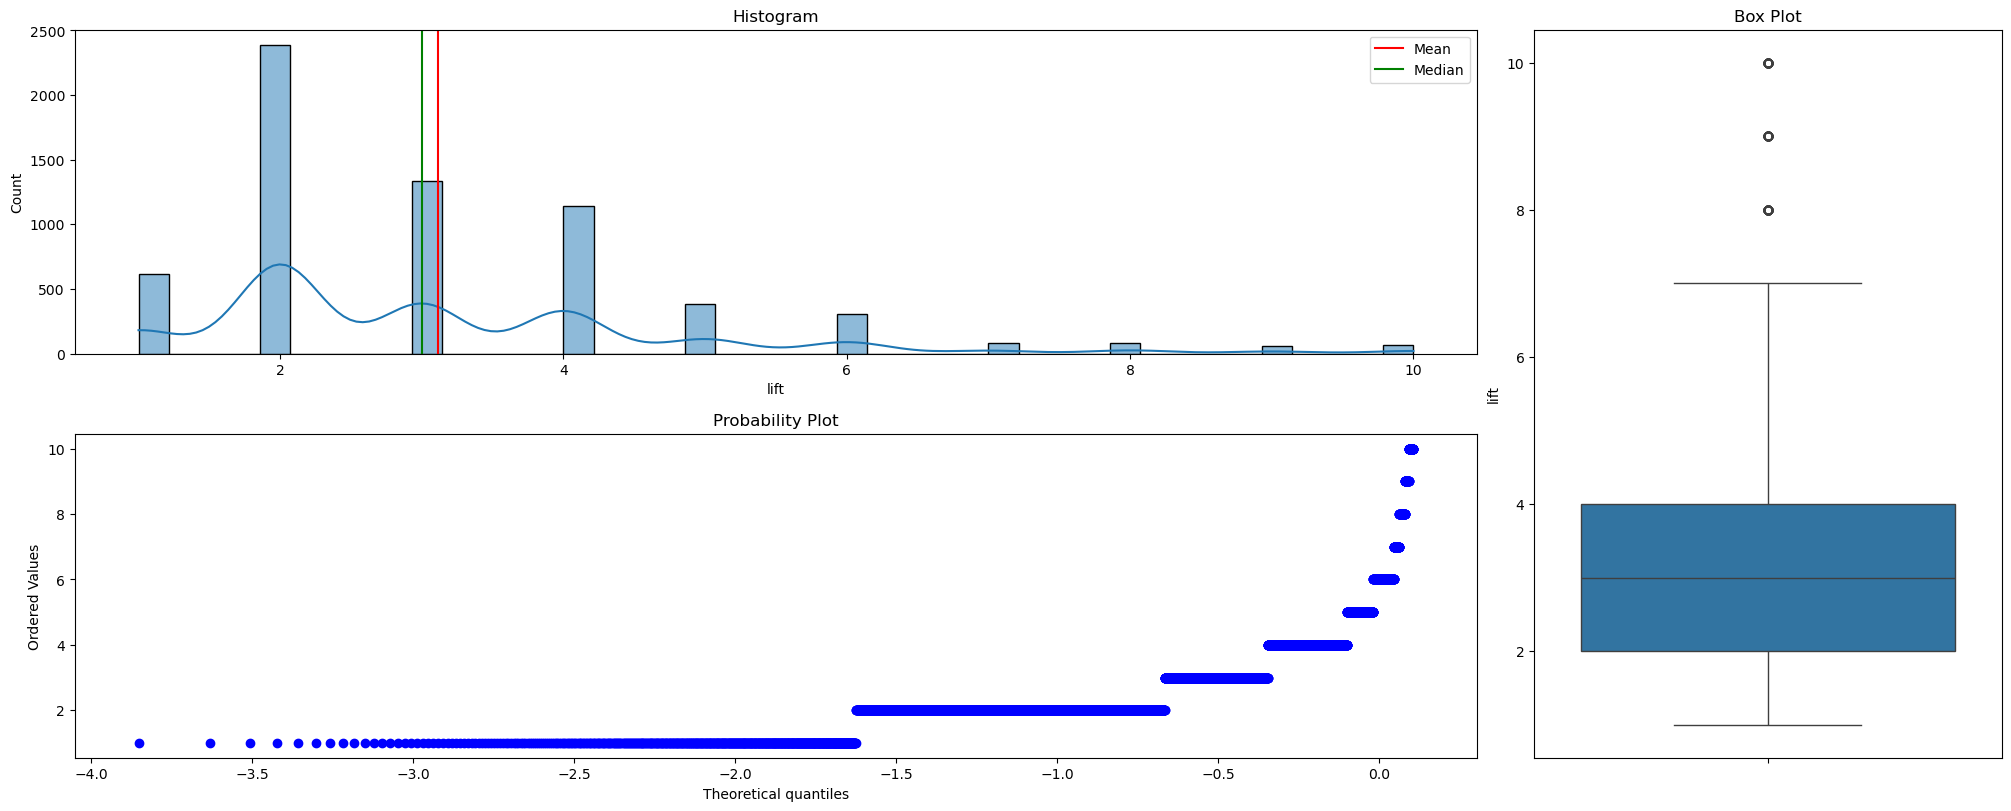

In [67]:
num_three_chart_plot(df, 'lift')

In [68]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'lift', quantiles_input)

skewness : 1.533098
kurtosis : 2.938088
--------------------------------------------------------------------
Q1 (25th percentile): 2.0000
Q3 (75th percentile): 4.0000
IQR: 2.0000
Lower bound: -1.0000
Upper bound: 7.0000
--------------------------------------------------------------------
10th percentile   2.0000
75th percentile   4.0000


# flat_on_floor

In [69]:
# no of unique categories and value_counts
analyze_value_counts(df, 'flat_on_floor', top_n=5)  

Unique Categories in 'flat_on_floor': 71
--------------------------------------------------
flat_on_floor
3.0    680
2.0    672
5.0    637
1.0    633
4.0    605
Name: count, dtype: int64


In [70]:
#missing values and describe
analyze_column(df, 'flat_on_floor')

Missing Values in 'flat_on_floor': 2292
--------------------------------------------------
count    9610.000000
mean       10.867534
std        10.133259
min        -2.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        75.000000
Name: flat_on_floor, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


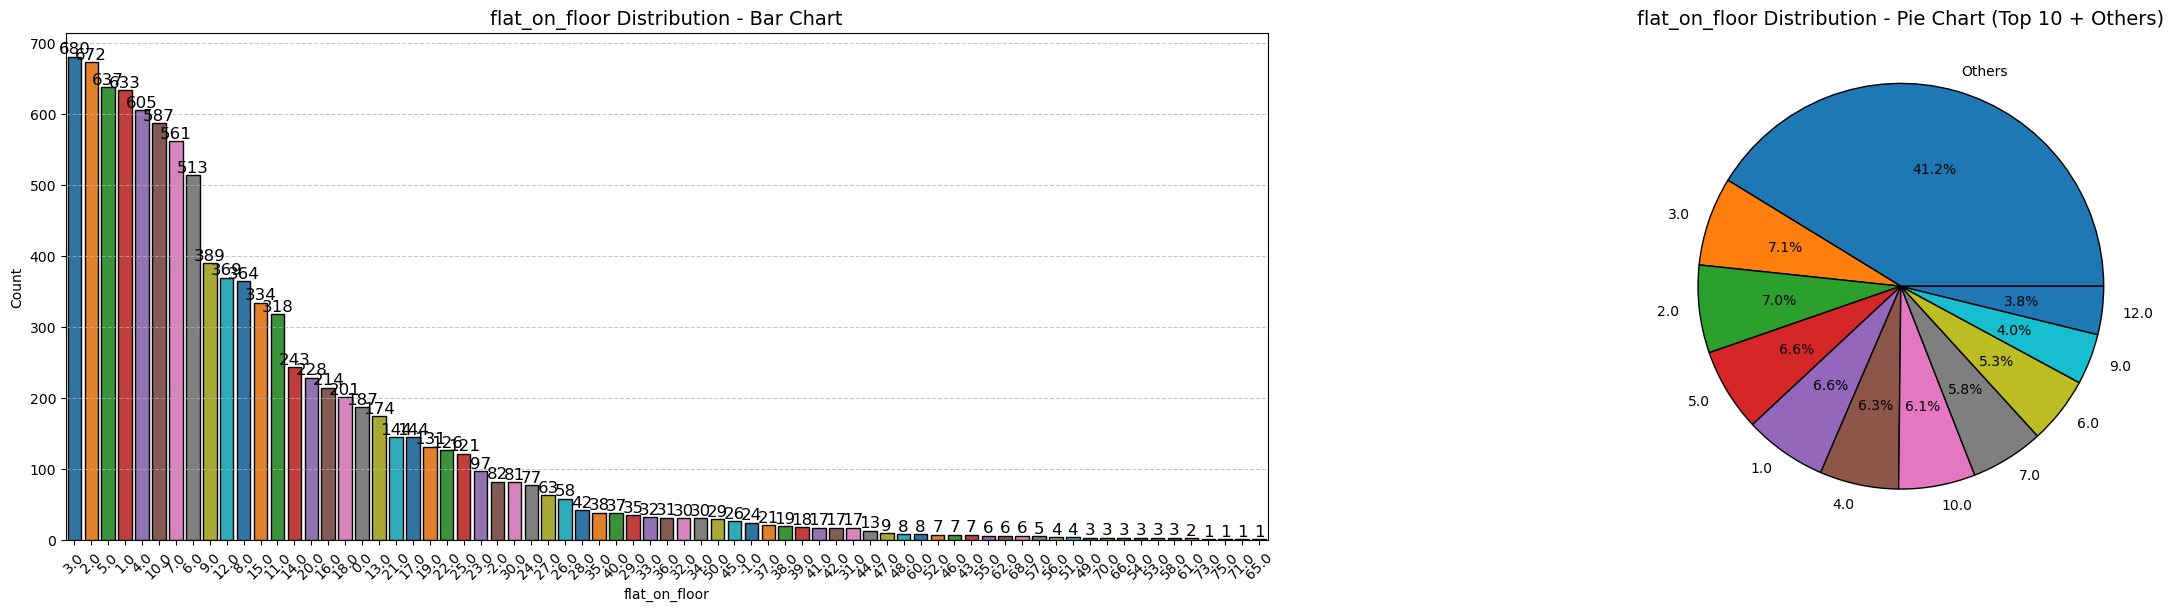

In [71]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'flat_on_floor', top_n=10) 

In [72]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'flat_on_floor',8, 0.90)

Top 8 cumulative values:
flat_on_floor
3.0     0.070760
2.0     0.140687
5.0     0.206972
1.0     0.272841
4.0     0.335796
10.0    0.396878
7.0     0.455255
6.0     0.508637
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 25 Properties below 90.0% percentile: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0]


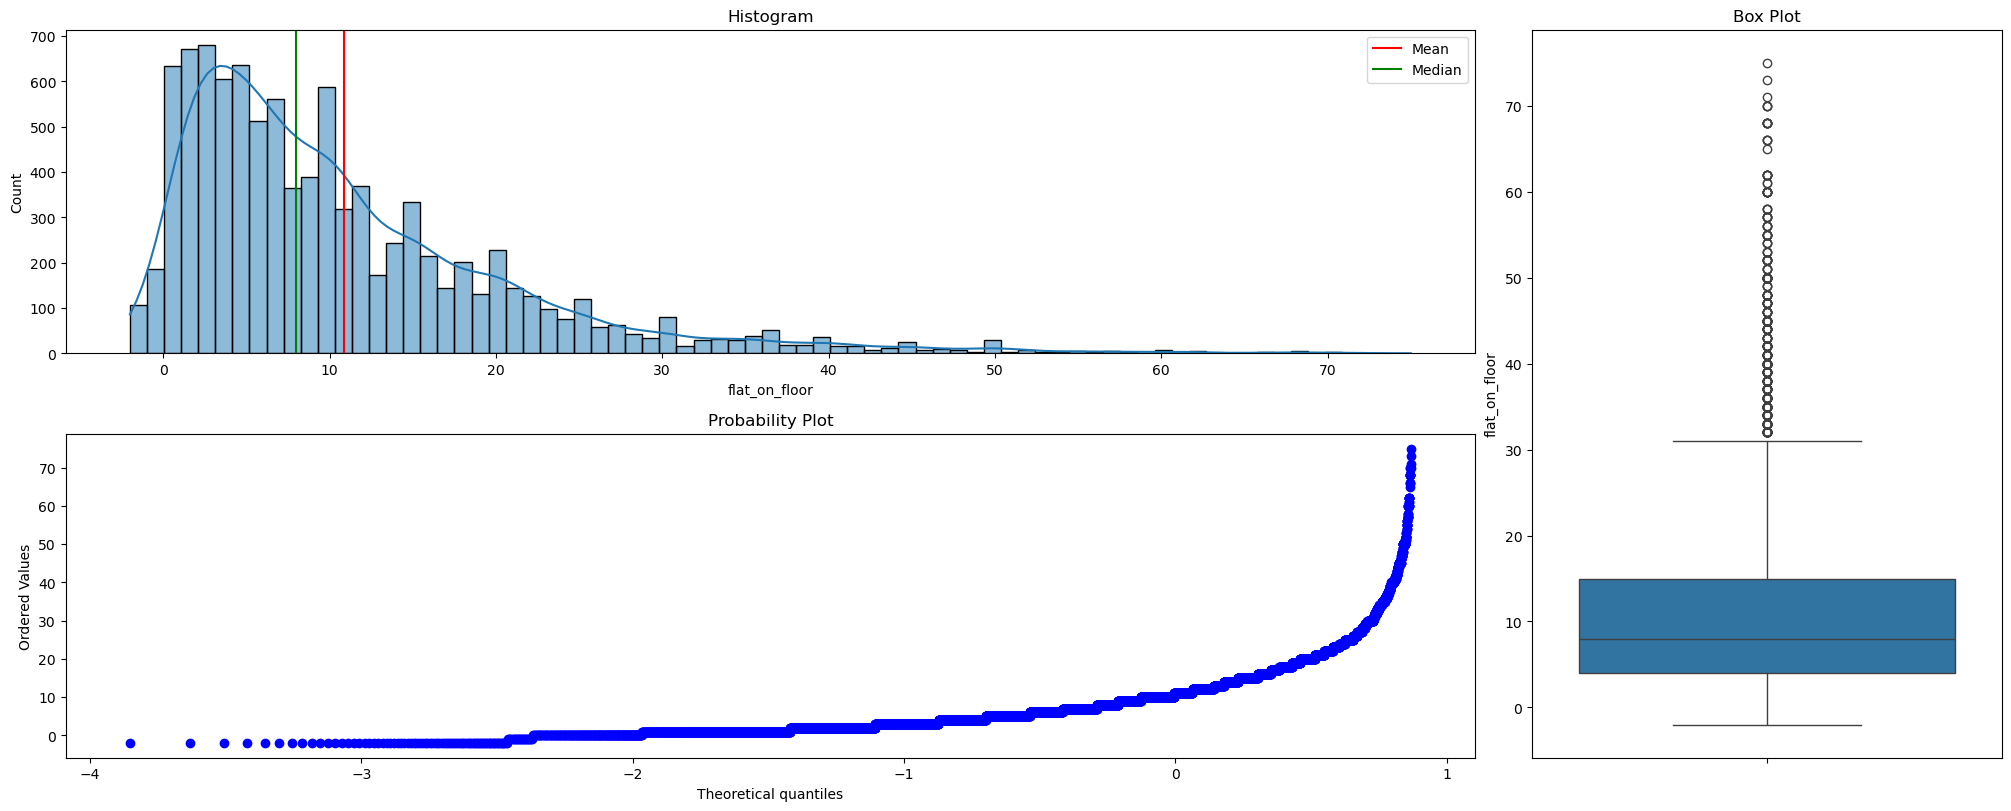

In [73]:
num_three_chart_plot(df, 'flat_on_floor')

In [74]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'flat_on_floor', quantiles_input)

skewness : 1.861342
kurtosis : 4.736611
--------------------------------------------------------------------
Q1 (25th percentile): 4.0000
Q3 (75th percentile): 15.0000
IQR: 11.0000
Lower bound: -12.5000
Upper bound: 31.5000
--------------------------------------------------------------------
10th percentile   2.0000
75th percentile   15.0000


# total_floor

In [75]:
# no of unique categories and value_counts
analyze_value_counts(df, 'total_floor', top_n=5)  

Unique Categories in 'total_floor': 85
--------------------------------------------------
total_floor
7.0     1018
4.0      555
22.0     541
20.0     378
23.0     331
Name: count, dtype: int64


In [76]:
#missing values and describe
analyze_column(df, 'total_floor')

Missing Values in 'total_floor': 2059
--------------------------------------------------
count    9843.000000
mean       22.179315
std        16.209919
min         1.000000
25%         8.000000
50%        19.000000
75%        30.000000
max        92.000000
Name: total_floor, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


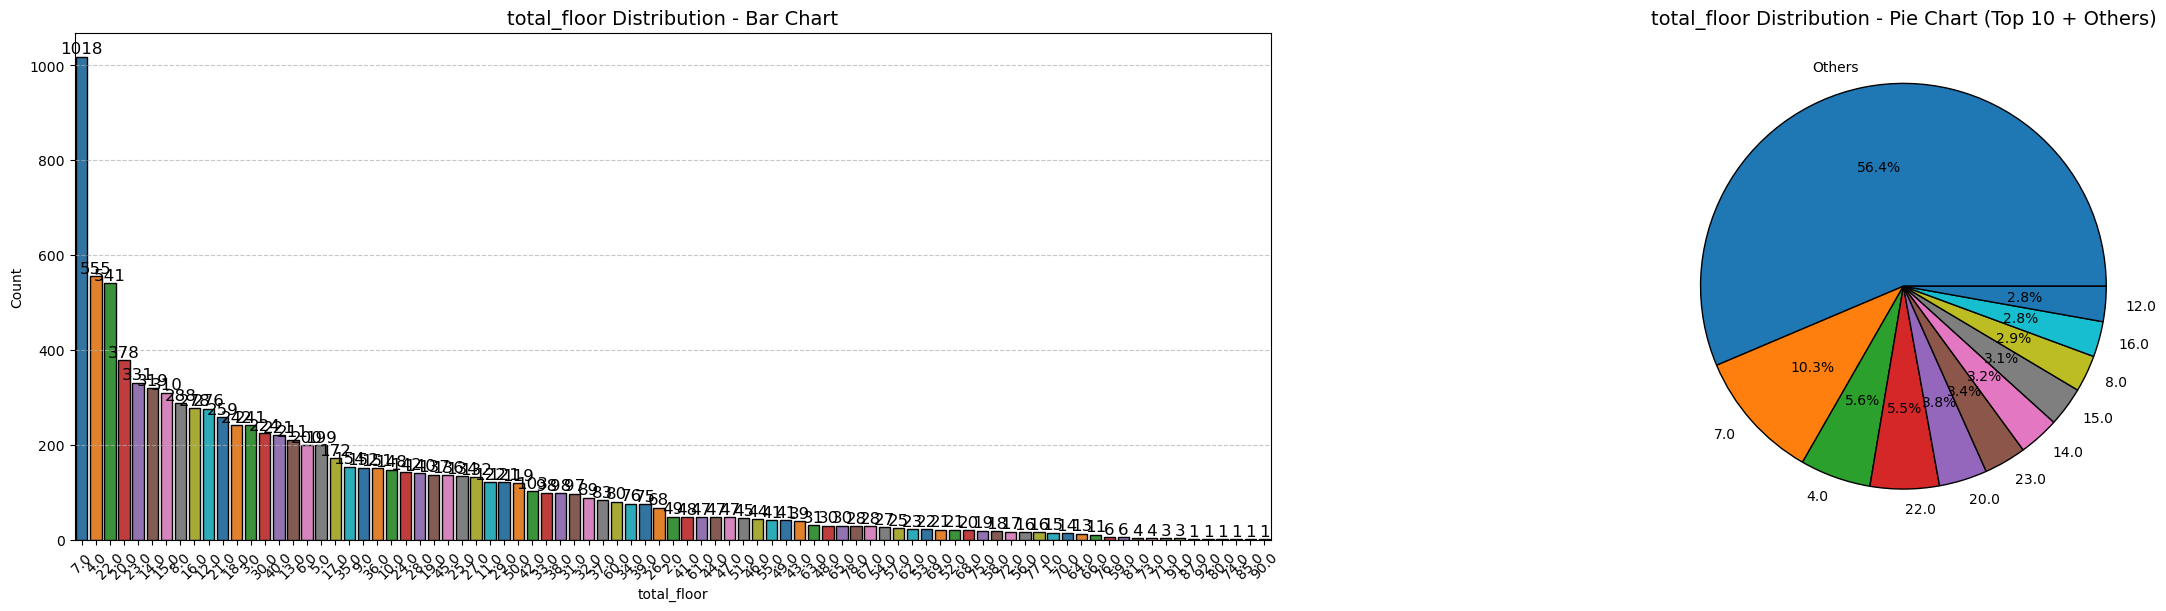

In [77]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'total_floor', top_n=10) 

In [78]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'total_floor',5, 0.90)

Top 5 cumulative values:
total_floor
7.0     0.103424
4.0     0.159809
22.0    0.214772
20.0    0.253175
23.0    0.286803
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 42 Properties below 90.0% percentile: [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 42.0, 45.0, 50.0, 60.0]


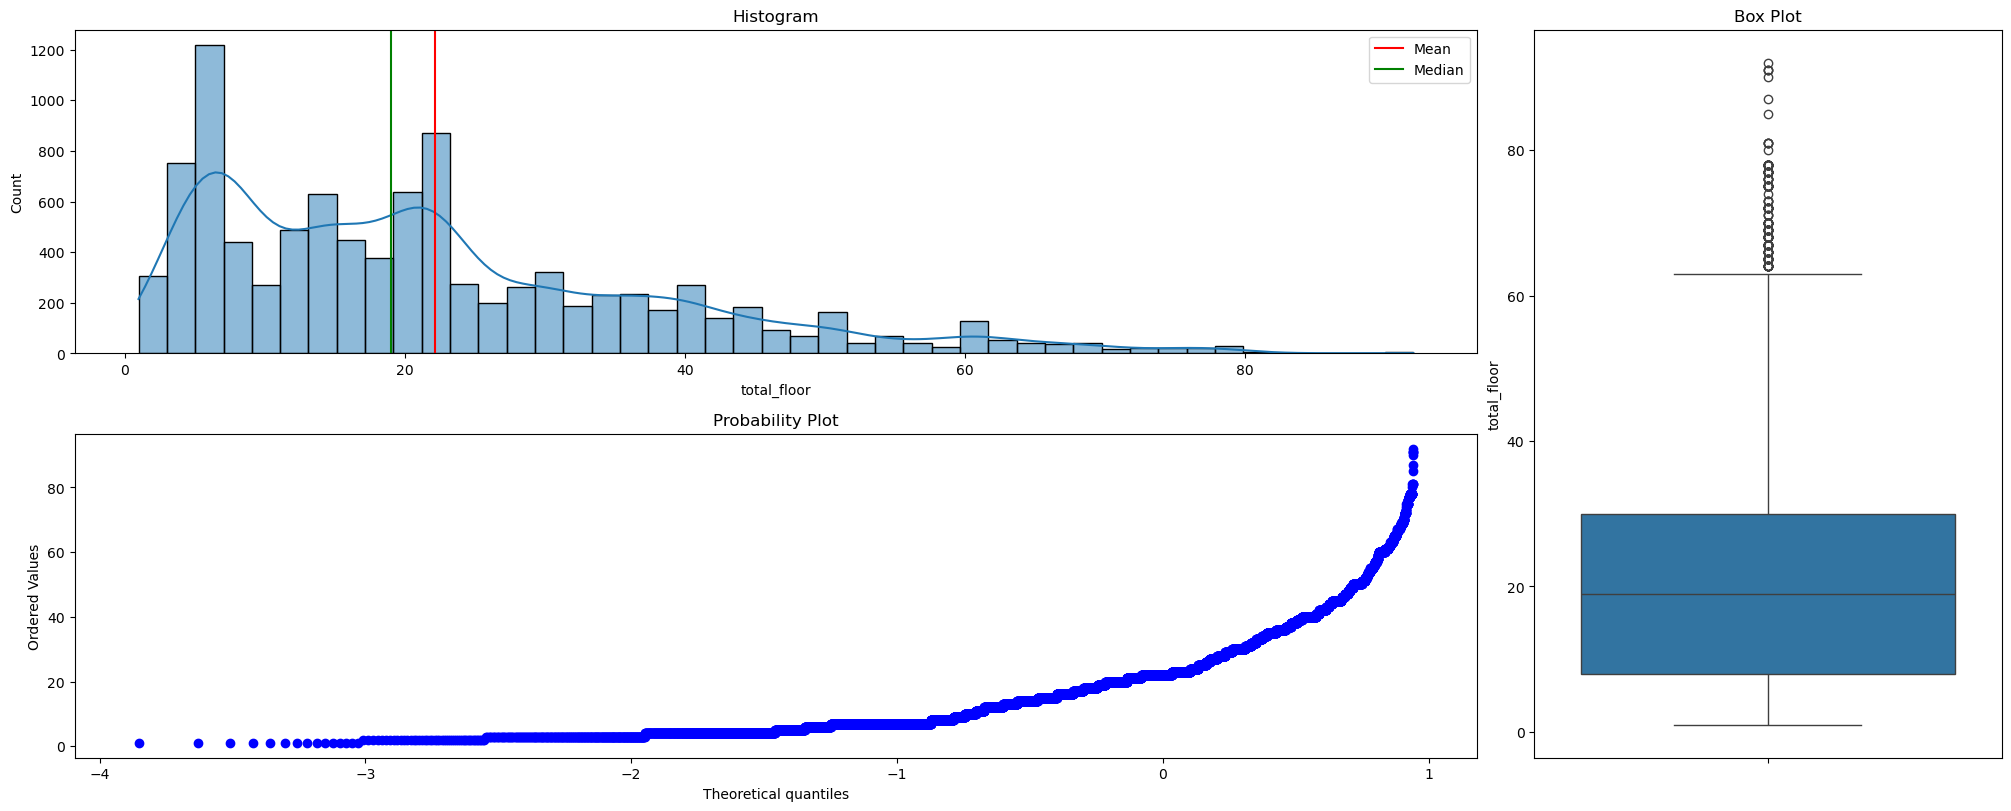

In [79]:
num_three_chart_plot(df, 'total_floor')

In [80]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'total_floor', quantiles_input)

skewness : 1.116649
kurtosis : 0.935459
--------------------------------------------------------------------
Q1 (25th percentile): 8.0000
Q3 (75th percentile): 30.0000
IQR: 22.0000
Lower bound: -25.0000
Upper bound: 63.0000
--------------------------------------------------------------------
10th percentile   5.0000
75th percentile   30.0000


# balcony

In [81]:
# no of unique categories and value_counts
analyze_value_counts(df, 'balcony', top_n=5)  

Unique Categories in 'balcony': 8
--------------------------------------------------
balcony
1.0    3064
2.0    1469
3.0    1101
4.0     332
5.0      76
Name: count, dtype: int64


In [82]:
#missing values and describe
analyze_column(df, 'balcony')

Missing Values in 'balcony': 5828
--------------------------------------------------
count    6074.000000
mean        1.847218
std         1.049587
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: balcony, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


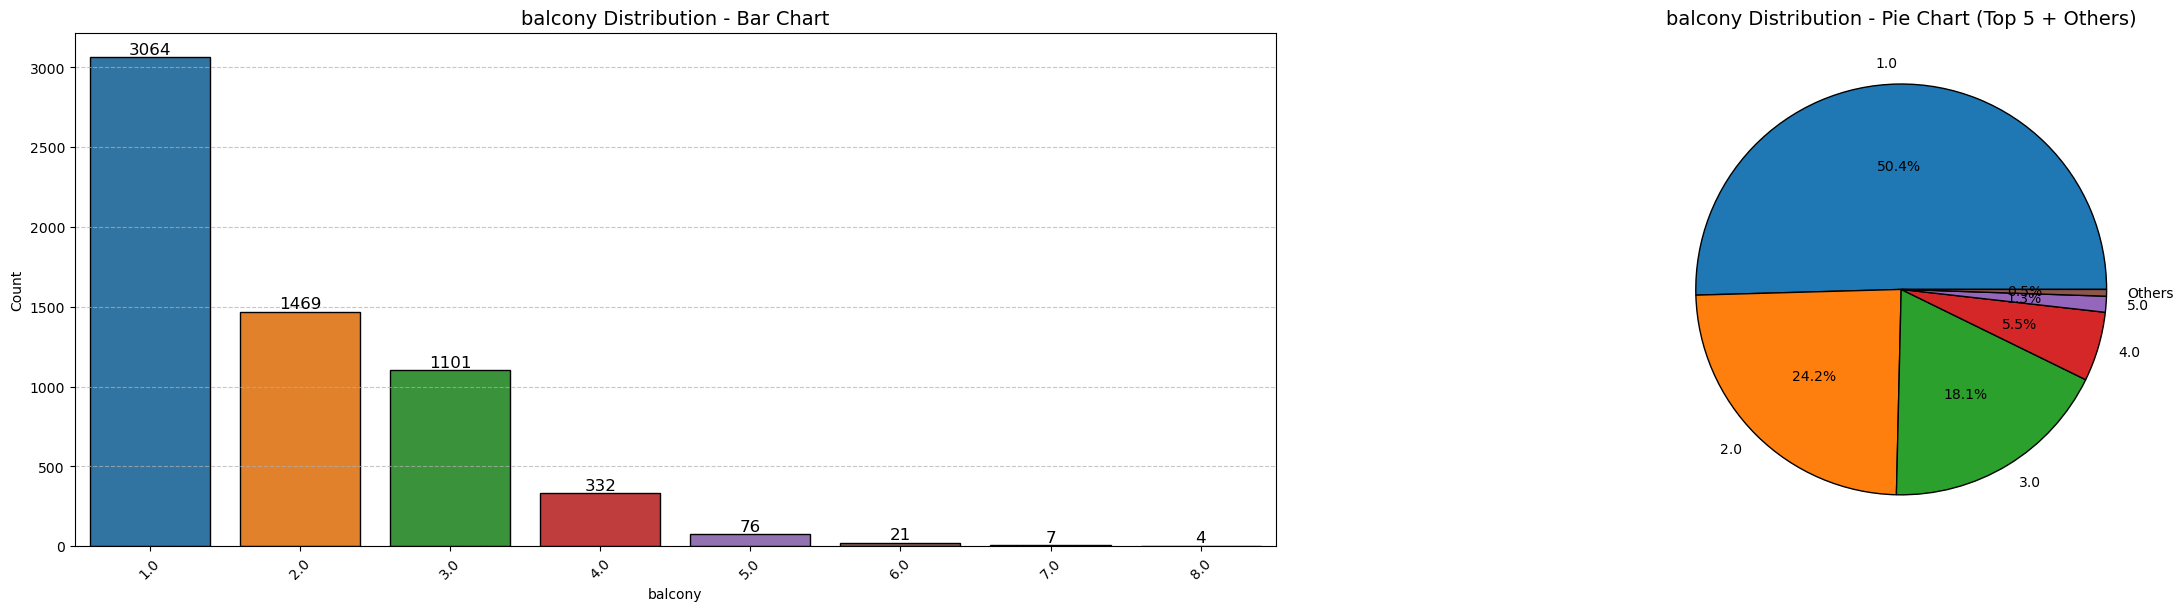

In [83]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'balcony', top_n=5) 

In [84]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'balcony',8, 0.90)

Top 8 cumulative values:
balcony
1.0    0.504445
2.0    0.746296
3.0    0.927560
4.0    0.982219
5.0    0.994732
6.0    0.998189
7.0    0.999341
8.0    1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


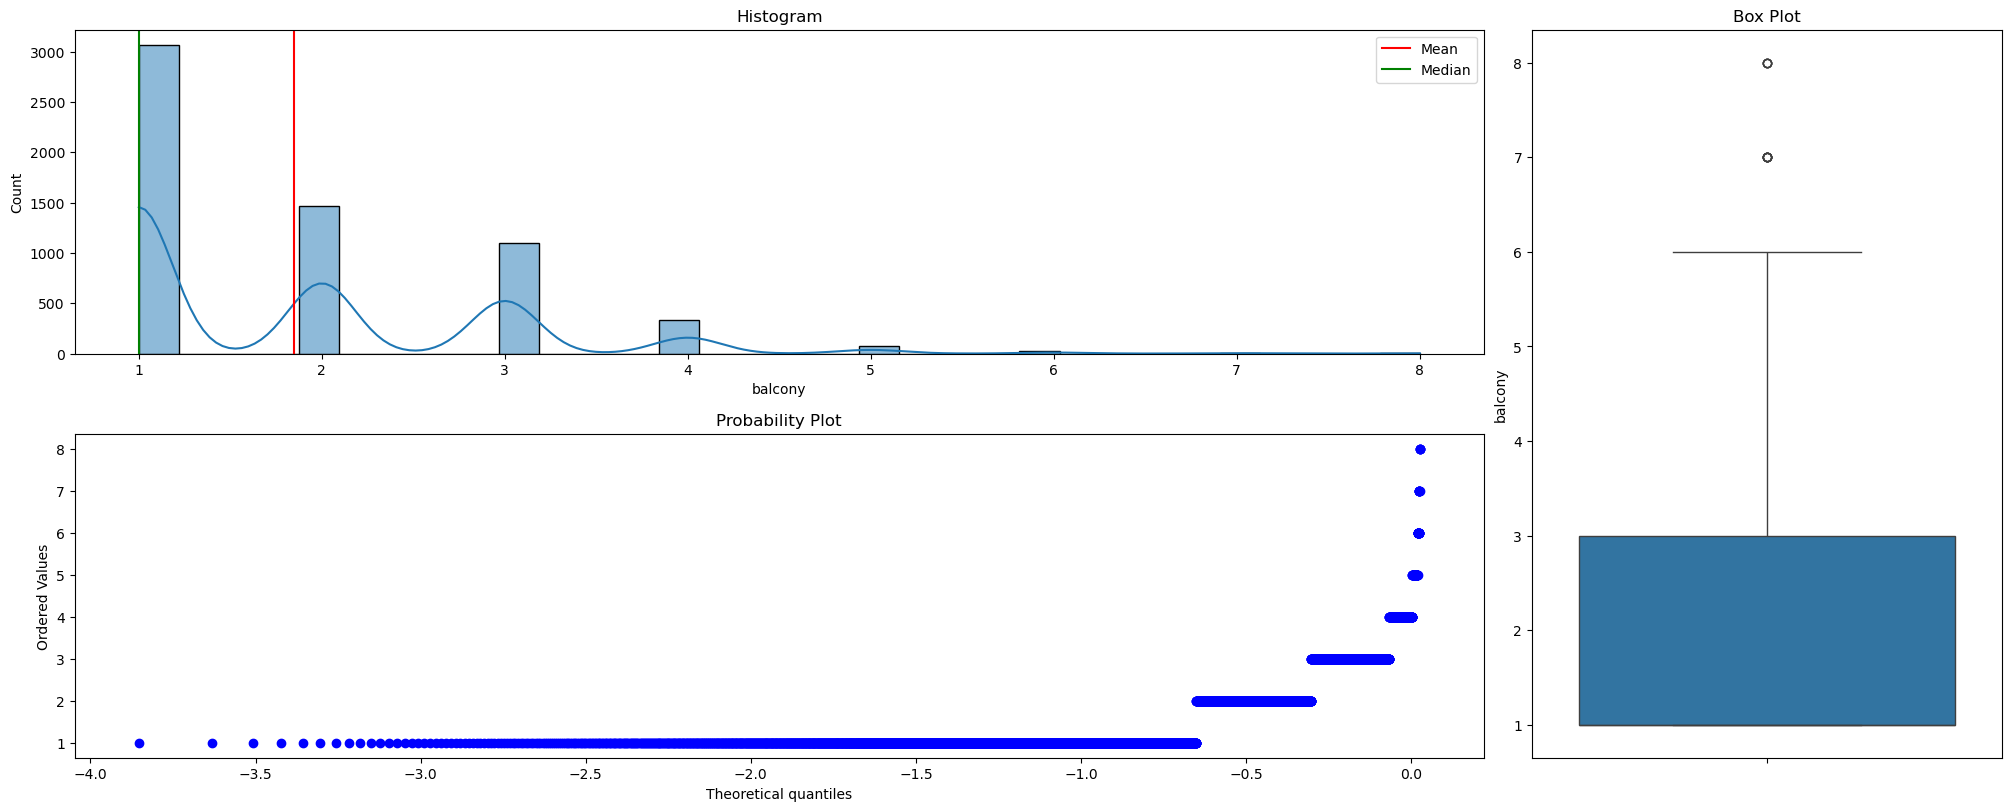

In [85]:
num_three_chart_plot(df, 'balcony')

In [86]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'balcony', quantiles_input)

skewness : 1.270163
kurtosis : 1.762489
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 3.0000
IQR: 2.0000
Lower bound: -2.0000
Upper bound: 6.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


# bed 

In [87]:
# no of unique categories and value_counts
analyze_value_counts(df, 'bed', top_n=5)  

Unique Categories in 'bed': 9
--------------------------------------------------
bed
2.0    4862
1.0    3185
3.0    2899
4.0     757
5.0     127
Name: count, dtype: int64


In [88]:
#missing values and describe
analyze_column(df, 'bed')

Missing Values in 'bed': 0
--------------------------------------------------
count    11902.000000
mean         2.162242
std          0.981199
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bed, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


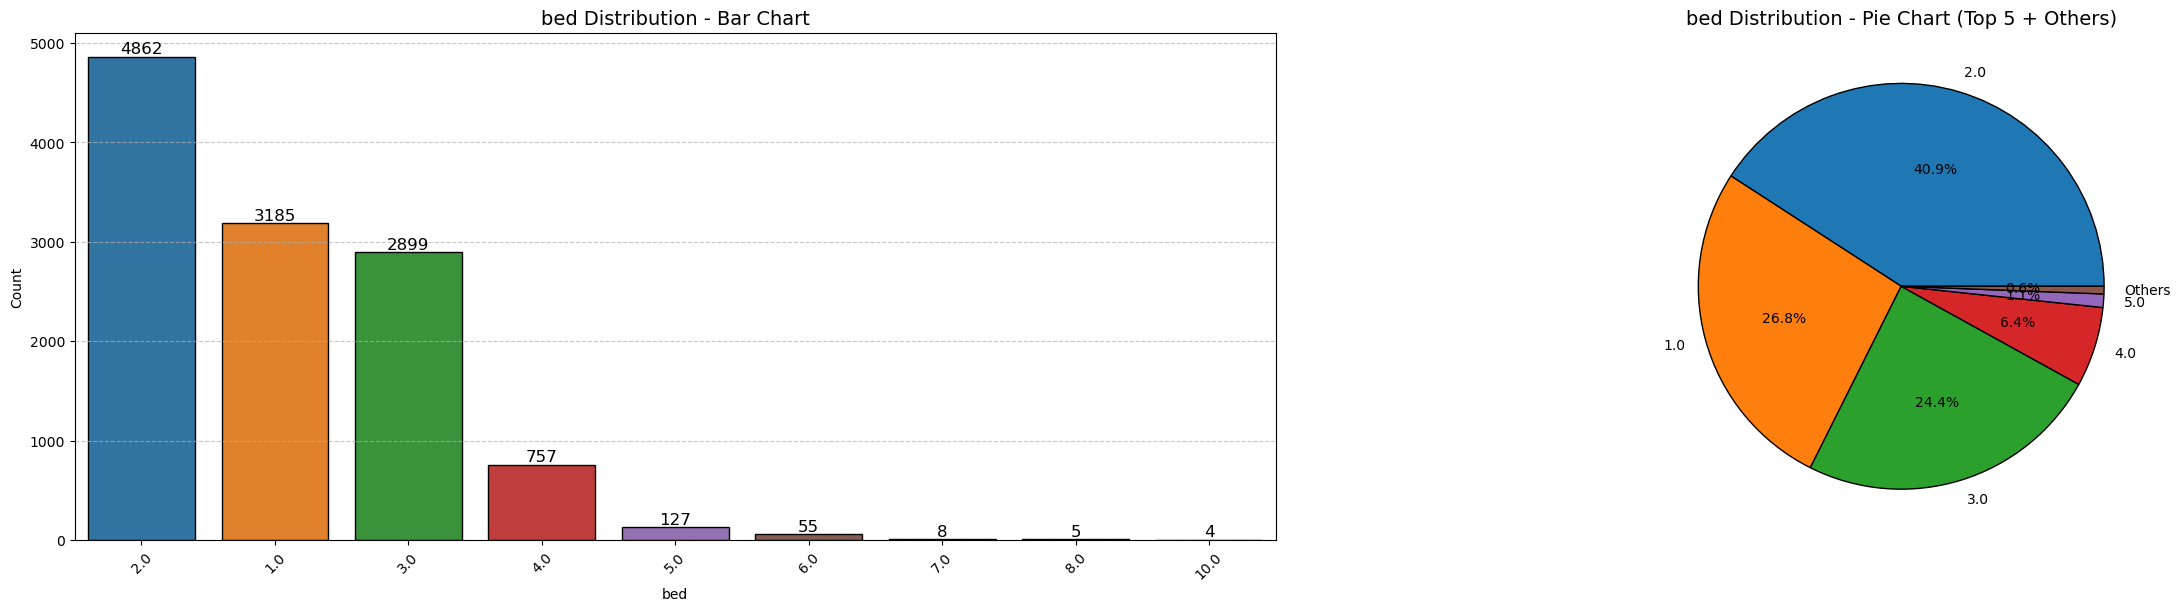

In [168]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bed', top_n=5) 

In [90]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'bed',9, 0.90)

Top 9 cumulative values:
bed
2.0     0.408503
1.0     0.676105
3.0     0.919677
4.0     0.983280
5.0     0.993951
6.0     0.998572
7.0     0.999244
8.0     0.999664
10.0    1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


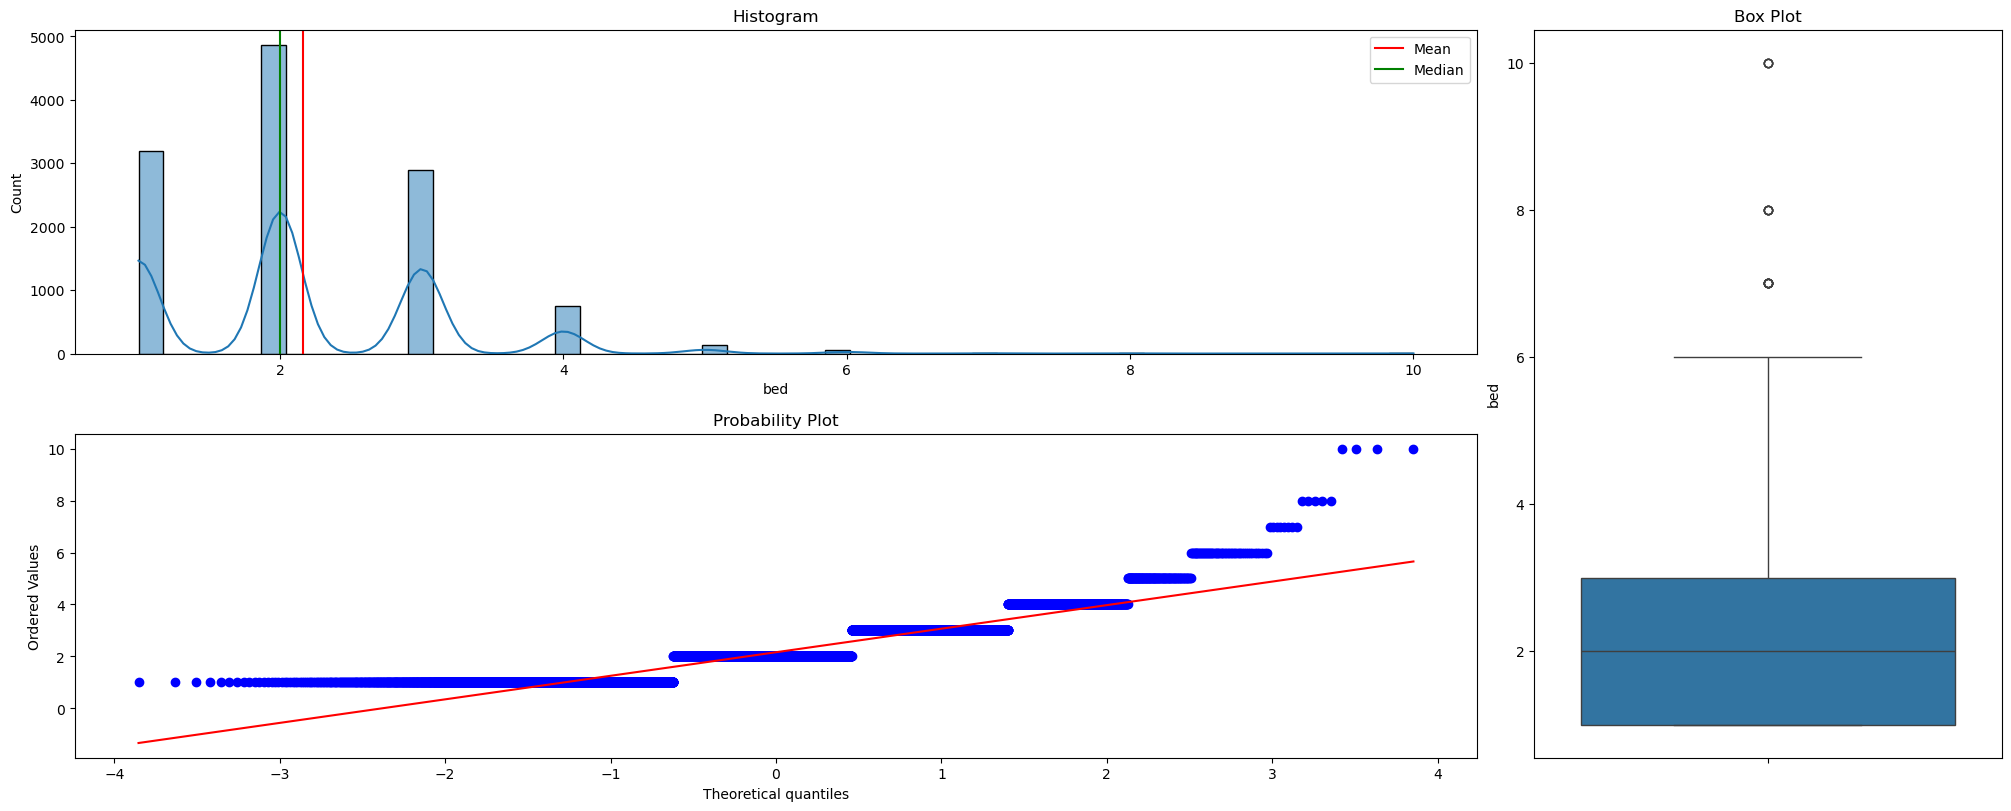

In [91]:
num_three_chart_plot(df, 'bed')

In [92]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'bed', quantiles_input)

skewness : 0.998133
kurtosis : 2.561700
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 3.0000
IQR: 2.0000
Lower bound: -2.0000
Upper bound: 6.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


# lattitude

In [93]:
# no of unique categories and value_counts
analyze_value_counts(df, 'lattitude', top_n=5)  

Unique Categories in 'lattitude': 2926
--------------------------------------------------
lattitude
19.205002    235
19.119677    230
19.174954    206
19.227262    186
19.282975    176
Name: count, dtype: int64


In [94]:
#missing values and describe
analyze_column(df, 'lattitude')

Missing Values in 'lattitude': 466
--------------------------------------------------
count    11436.000000
mean        19.153553
std          0.734919
min          9.209138
25%         19.062055
50%         19.143882
75%         19.210299
max         72.875061
Name: lattitude, dtype: float64


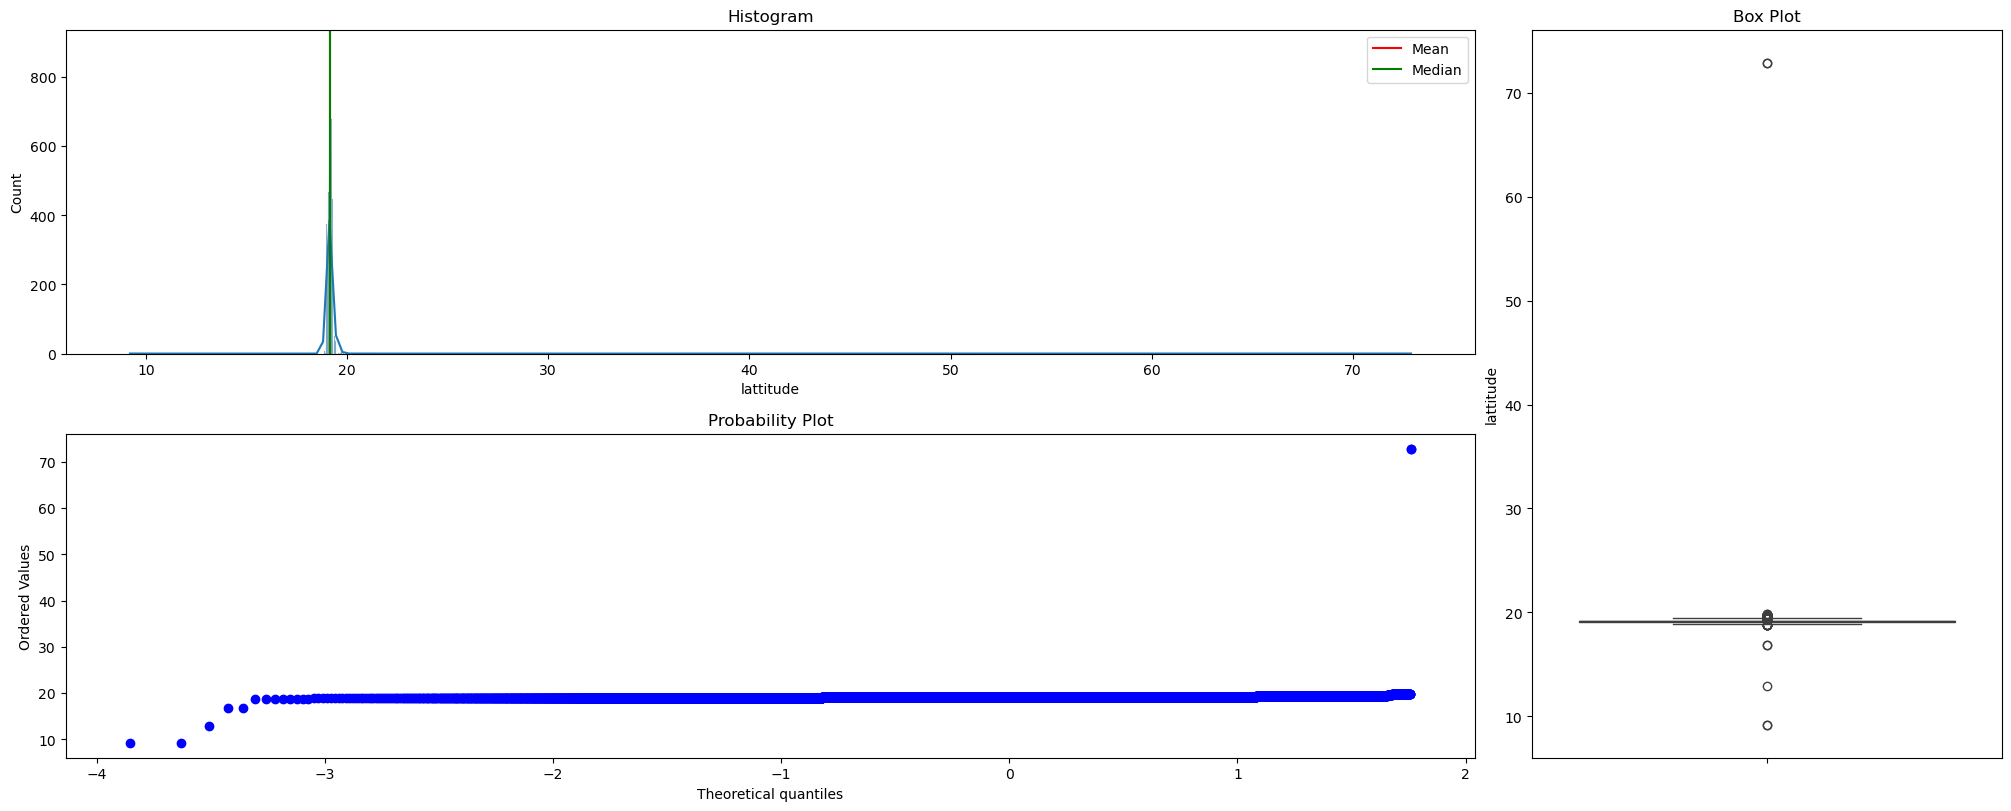

In [95]:
num_three_chart_plot(df, 'lattitude')

In [96]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'lattitude', quantiles_input)

skewness : 67.724314
kurtosis : 4988.495947
--------------------------------------------------------------------
Q1 (25th percentile): 19.0621
Q3 (75th percentile): 19.2103
IQR: 0.1482
Lower bound: 18.8397
Upper bound: 19.4327
--------------------------------------------------------------------
10th percentile   19.0036
75th percentile   19.2103


# longitude

In [97]:
# no of unique categories and value_counts
analyze_value_counts(df, 'longitude', top_n=5)  

Unique Categories in 'longitude': 2862
--------------------------------------------------
longitude
72.869271    287
72.905081    230
72.943104    206
72.863440    186
72.873618    176
Name: count, dtype: int64


In [98]:
#missing values and describe
analyze_column(df, 'longitude')

Missing Values in 'longitude': 466
--------------------------------------------------
count    11436.000000
mean        72.896414
std          0.715627
min         19.024462
25%         72.839809
50%         72.872695
75%         72.963328
max         74.021019
Name: longitude, dtype: float64


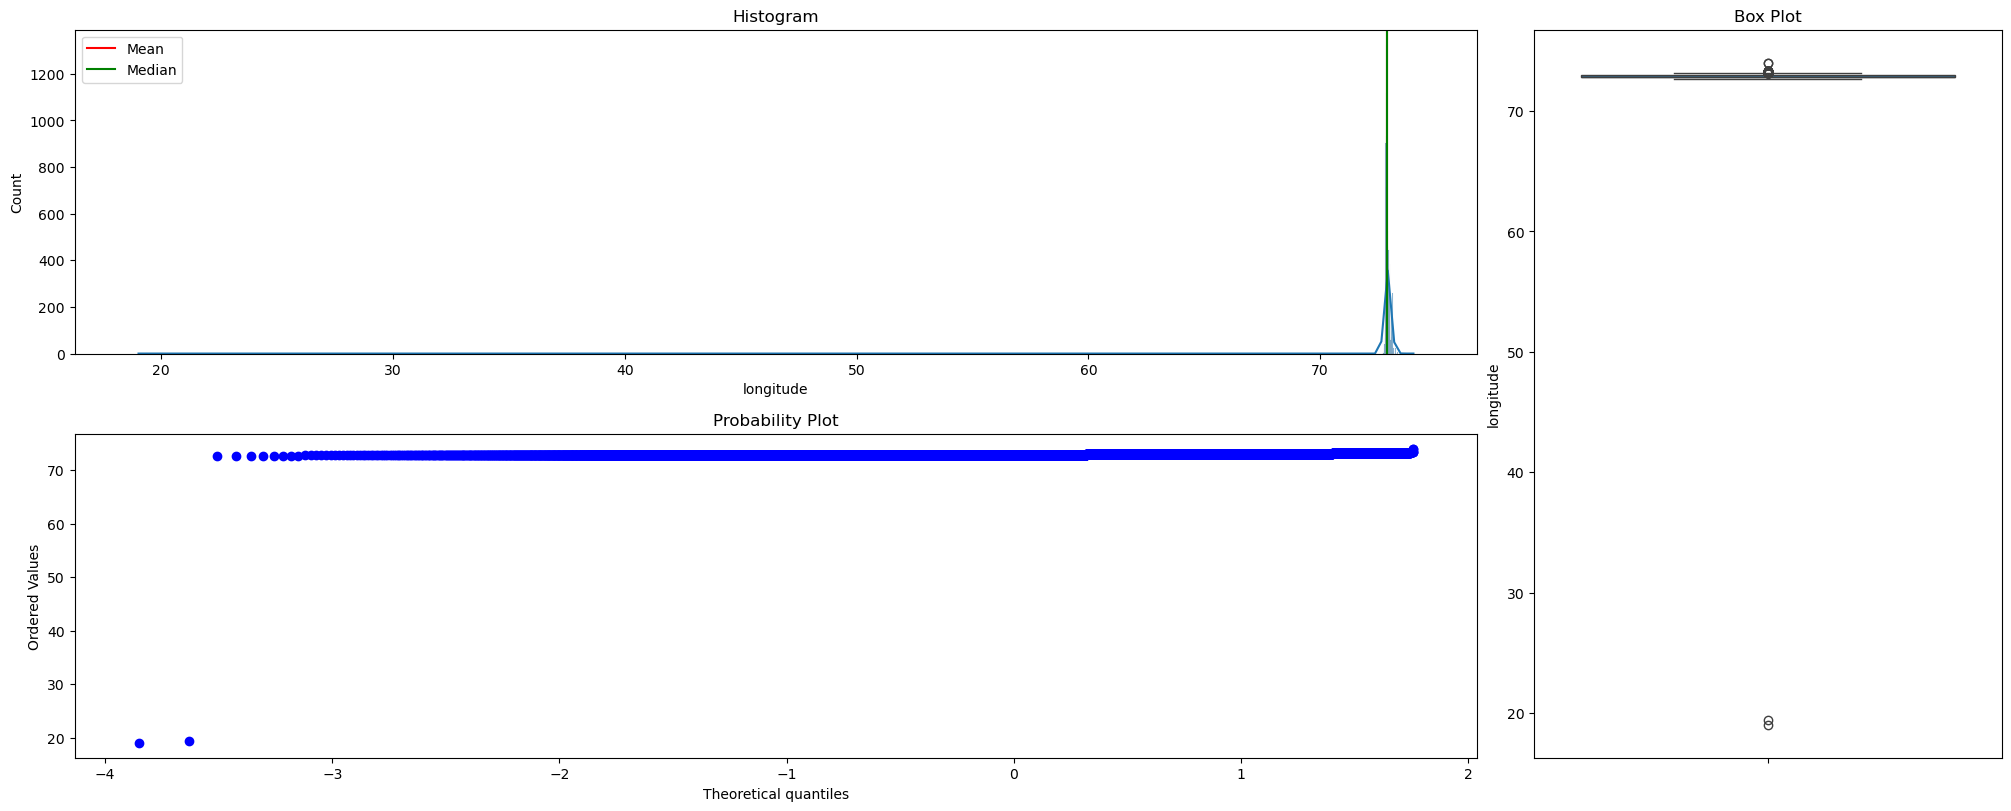

In [99]:
num_three_chart_plot(df, 'longitude')

In [100]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'longitude', quantiles_input)

skewness : -73.907970
kurtosis : 5545.195432
--------------------------------------------------------------------
Q1 (25th percentile): 72.8398
Q3 (75th percentile): 72.9633
IQR: 0.1235
Lower bound: 72.6545
Upper bound: 73.1486
--------------------------------------------------------------------
10th percentile   72.8257
75th percentile   72.9633


# assigned_amenities_score

In [101]:
# no of unique categories and value_counts
analyze_value_counts(df, 'assigned_amenities_score', top_n=5)  

Unique Categories in 'assigned_amenities_score': 337
--------------------------------------------------
assigned_amenities_score
88.0     123
282.0    112
271.0    112
100.0    104
60.0     100
Name: count, dtype: int64


In [102]:
#missing values and describe
analyze_column(df, 'assigned_amenities_score')

Missing Values in 'assigned_amenities_score': 5109
--------------------------------------------------
count    6793.000000
mean      145.883115
std       100.515463
min         5.000000
25%        70.000000
50%       113.000000
75%       207.000000
max       635.000000
Name: assigned_amenities_score, dtype: float64


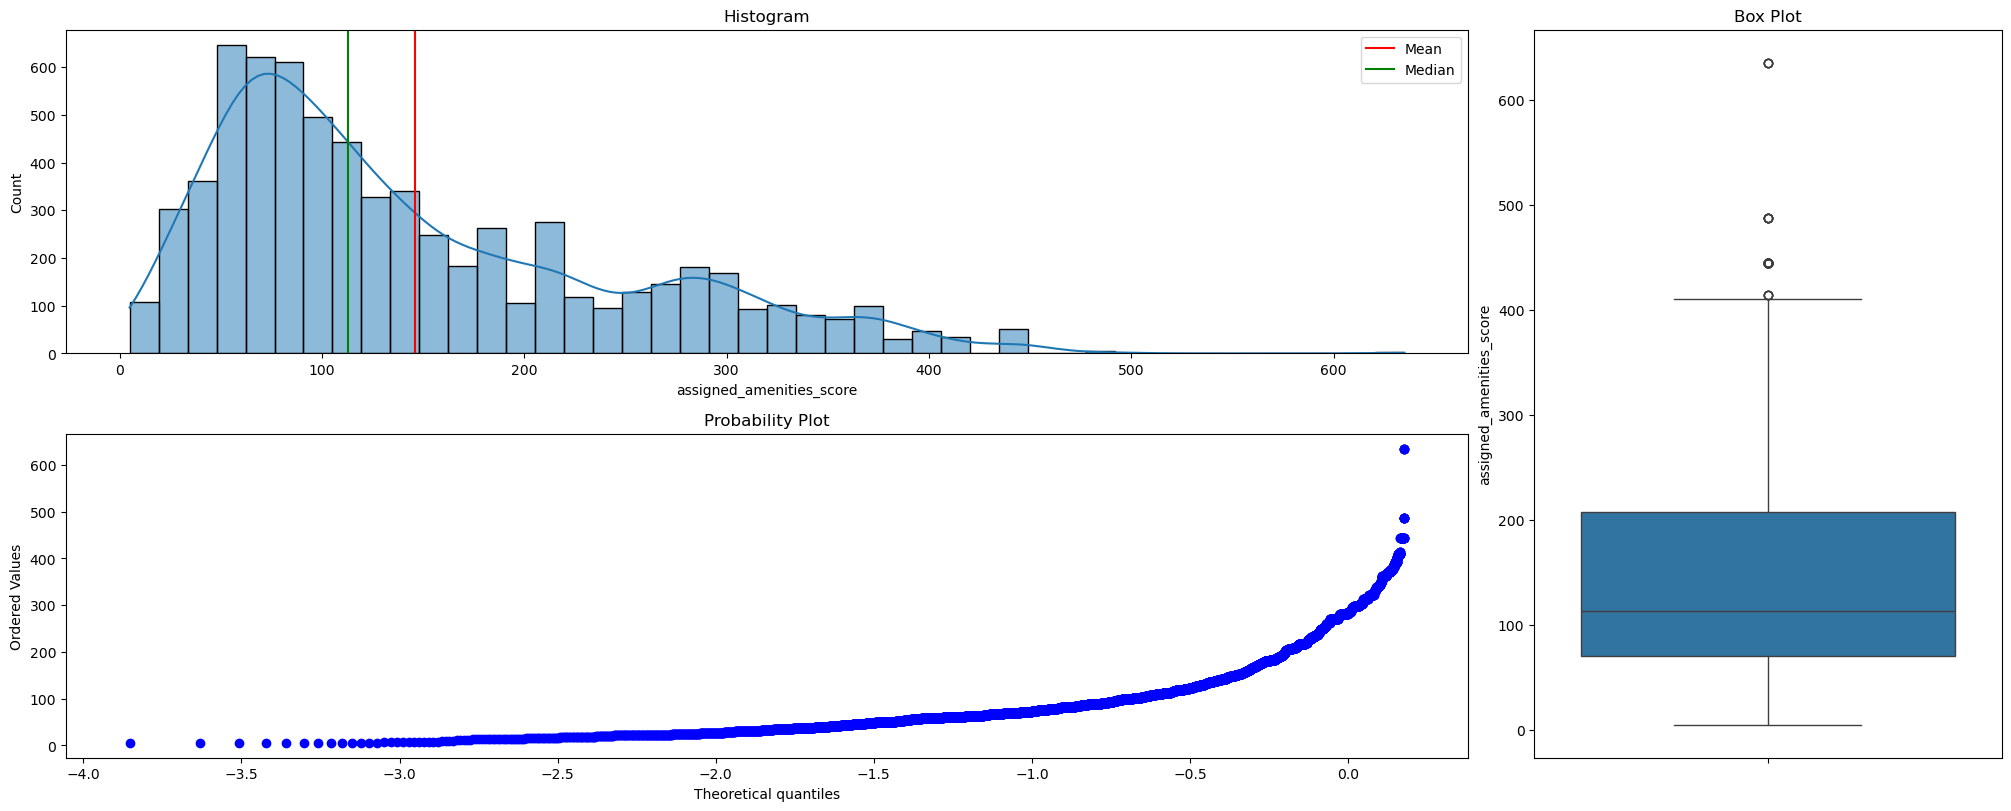

In [103]:
num_three_chart_plot(df, 'assigned_amenities_score')

In [104]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'assigned_amenities_score', quantiles_input)

skewness : 1.012819
kurtosis : 0.350300
--------------------------------------------------------------------
Q1 (25th percentile): 70.0000
Q3 (75th percentile): 207.0000
IQR: 137.0000
Lower bound: -135.5000
Upper bound: 412.5000
--------------------------------------------------------------------
10th percentile   44.0000
75th percentile   207.0000


# emi

In [105]:
# no of unique categories and value_counts
analyze_value_counts(df, 'emi', top_n=5)  

Unique Categories in 'emi': 589
--------------------------------------------------
emi
0.41    173
0.50    169
0.56    165
0.32    164
0.90    162
Name: count, dtype: int64


In [106]:
#missing values and describe
analyze_column(df, 'emi')

Missing Values in 'emi': 2
--------------------------------------------------
count    11900.00000
mean         1.31170
std          1.91131
min          0.00745
25%          0.43000
50%          0.80000
75%          1.44000
max         36.08000
Name: emi, dtype: float64


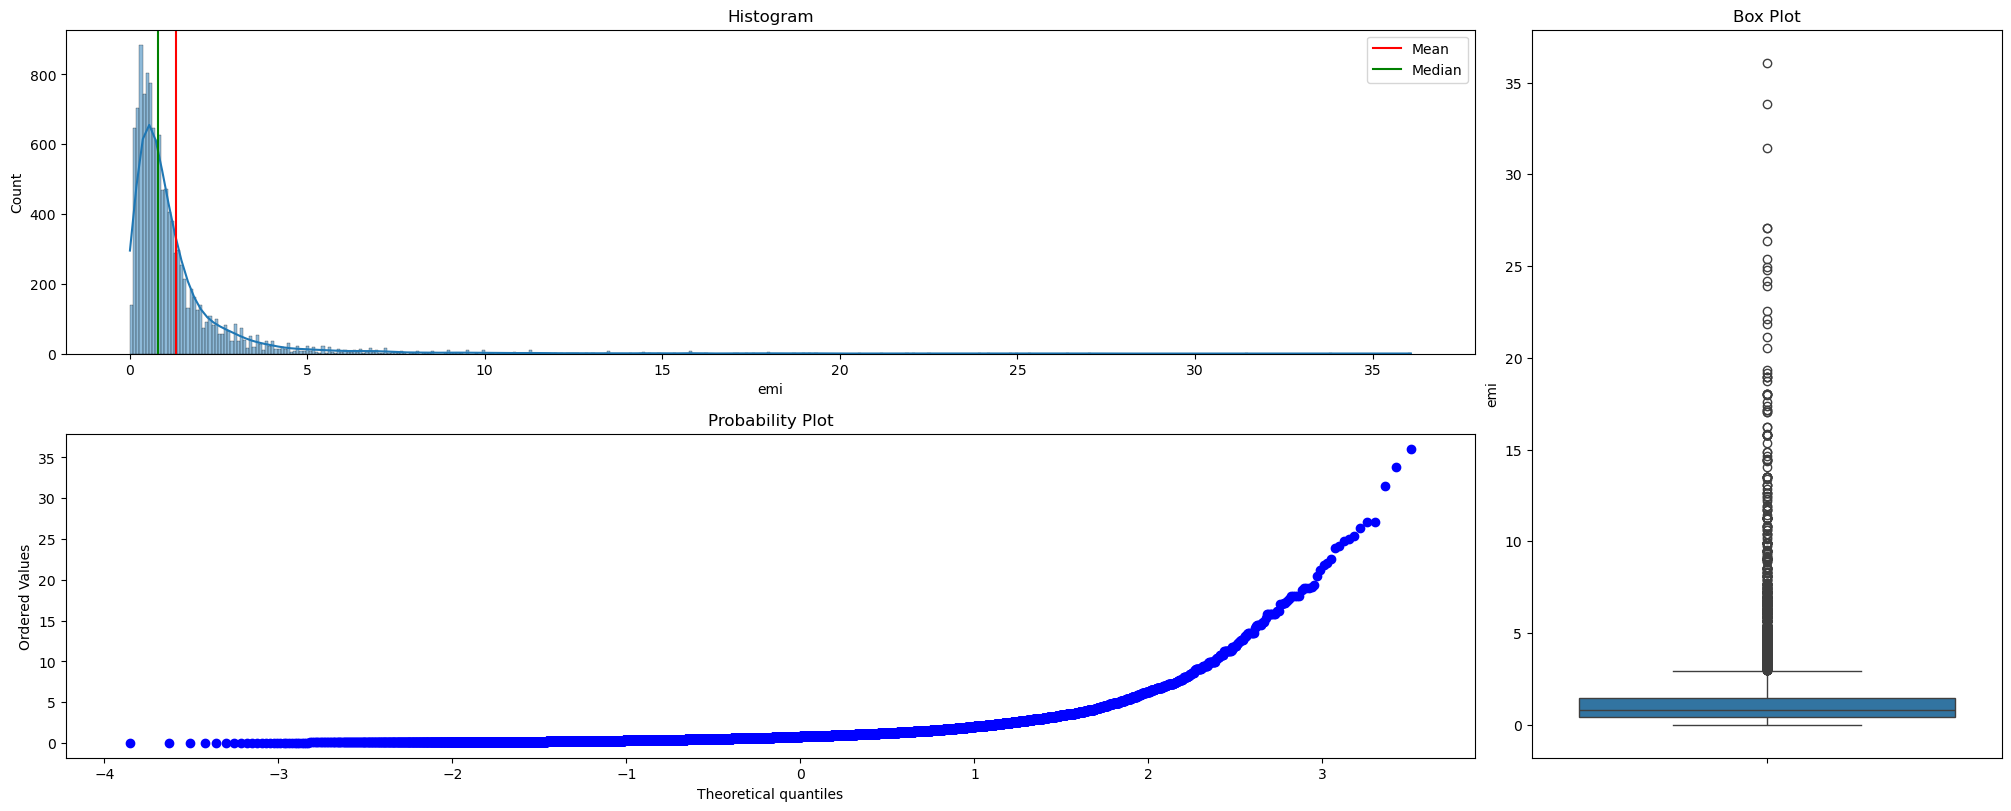

In [107]:
num_three_chart_plot(df, 'emi')

In [108]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'emi', quantiles_input)

skewness : 6.196518
kurtosis : 60.915584
--------------------------------------------------------------------
Q1 (25th percentile): 0.4300
Q3 (75th percentile): 1.4400
IQR: 1.0100
Lower bound: -1.0850
Upper bound: 2.9550
--------------------------------------------------------------------
10th percentile   0.2400
75th percentile   1.4400


# project_in_acres

In [109]:
# no of unique categories and value_counts
analyze_value_counts(df, 'project_in_acres', top_n=5)  

Unique Categories in 'project_in_acres': 207
--------------------------------------------------
project_in_acres
1.0    1290
2.0     789
3.0     516
4.0     418
6.0     284
Name: count, dtype: int64


In [110]:
#missing values and describe
analyze_column(df, 'project_in_acres')

Missing Values in 'project_in_acres': 5758
--------------------------------------------------
count     6144.000000
mean        27.368613
std        728.786747
min          0.000000
25%          1.000000
50%          3.000000
75%          8.499900
max      55000.000000
Name: project_in_acres, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


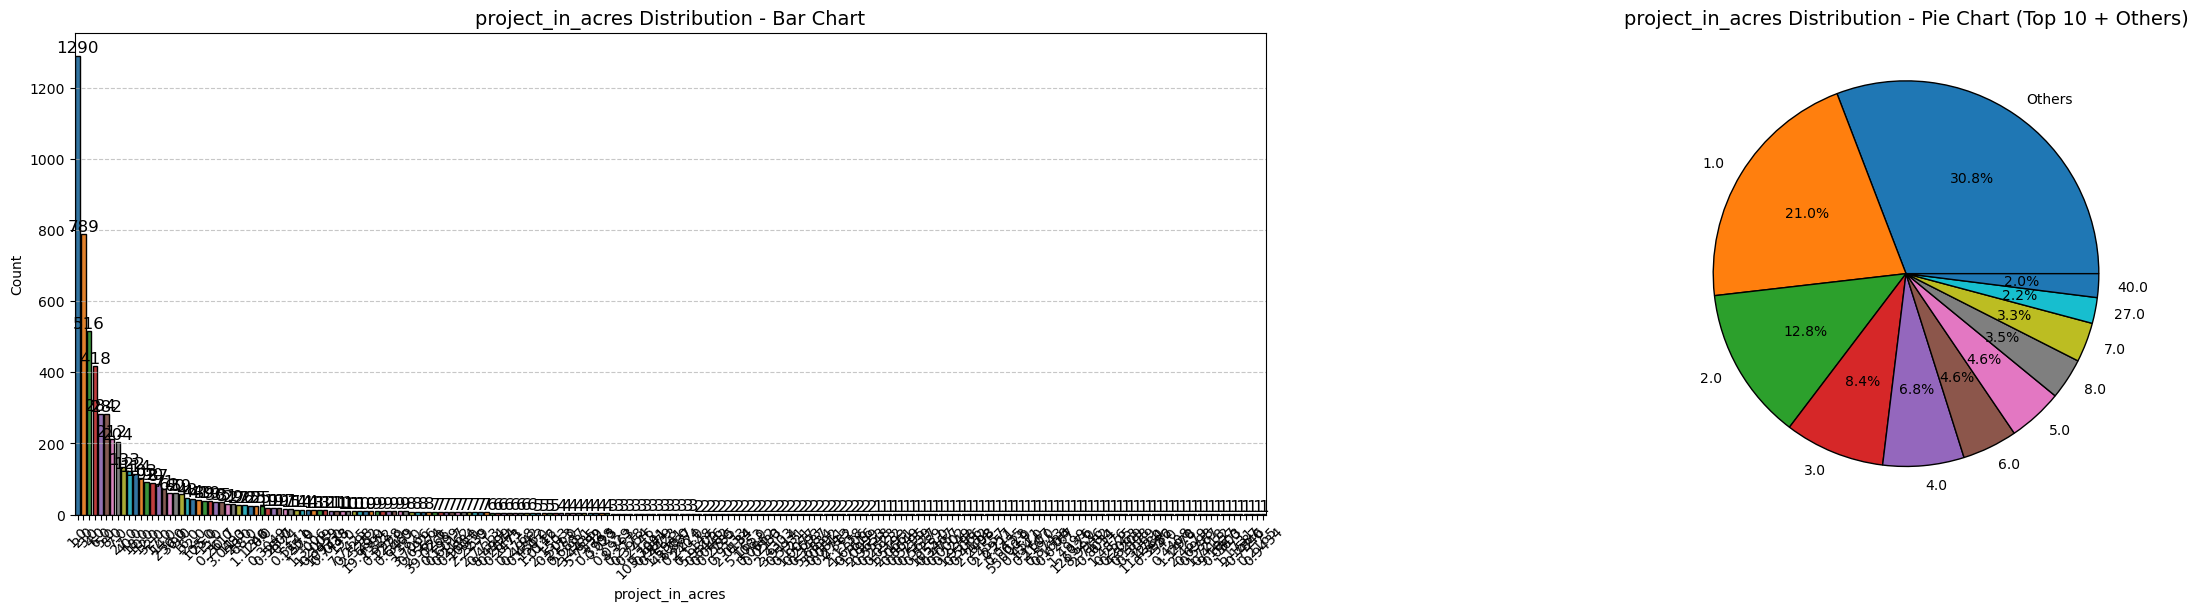

In [111]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'project_in_acres', top_n=10) 

In [112]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'project_in_acres',9, 0.90)

Top 9 cumulative values:
project_in_acres
1.0     0.209961
2.0     0.338379
3.0     0.422363
4.0     0.490397
6.0     0.536621
5.0     0.582520
8.0     0.617025
7.0     0.650228
27.0    0.671875
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 37 Properties below 90.0% percentile: [0.0, 0.24, 0.2617, 0.3049, 0.5807, 1.0, 1.1246, 2.0, 3.0, 3.0493, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 22.0, 23.0, 25.0, 27.0, 30.0, 32.0, 36.0, 40.0, 68.0, 105.0, 250.0]


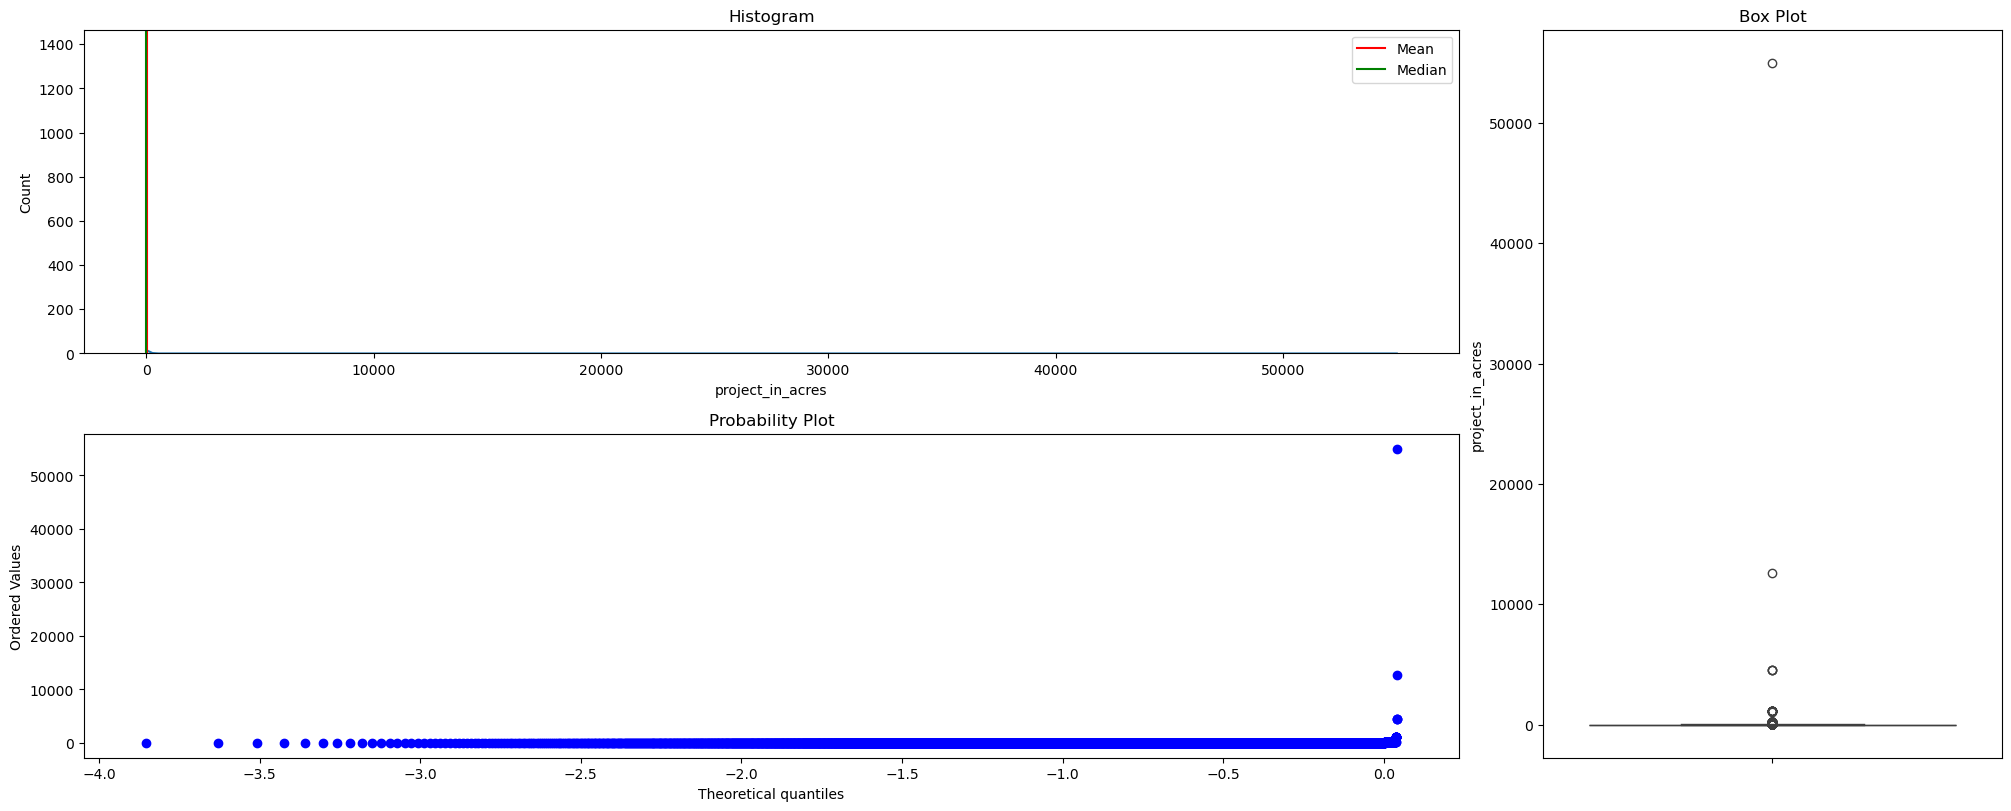

In [113]:
num_three_chart_plot(df, 'project_in_acres')

In [114]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'project_in_acres', quantiles_input)

skewness : 70.849690
kurtosis : 5287.347961
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 8.4999
IQR: 7.4999
Lower bound: -10.2499
Upper bound: 19.7497
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   8.4999


# assigned_flooring_score

In [115]:
# no of unique categories and value_counts
analyze_value_counts(df, 'assigned_flooring_score', top_n=5)  

Unique Categories in 'assigned_flooring_score': 46
--------------------------------------------------
assigned_flooring_score
7.0     3681
10.0     699
6.0      329
15.0     279
17.0     257
Name: count, dtype: int64


In [116]:
#missing values and describe
analyze_column(df, 'assigned_flooring_score')

Missing Values in 'assigned_flooring_score': 4454
--------------------------------------------------
count    7448.000000
mean       12.932599
std        10.363827
min         4.000000
25%         7.000000
50%         7.000000
75%        16.000000
max        56.000000
Name: assigned_flooring_score, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


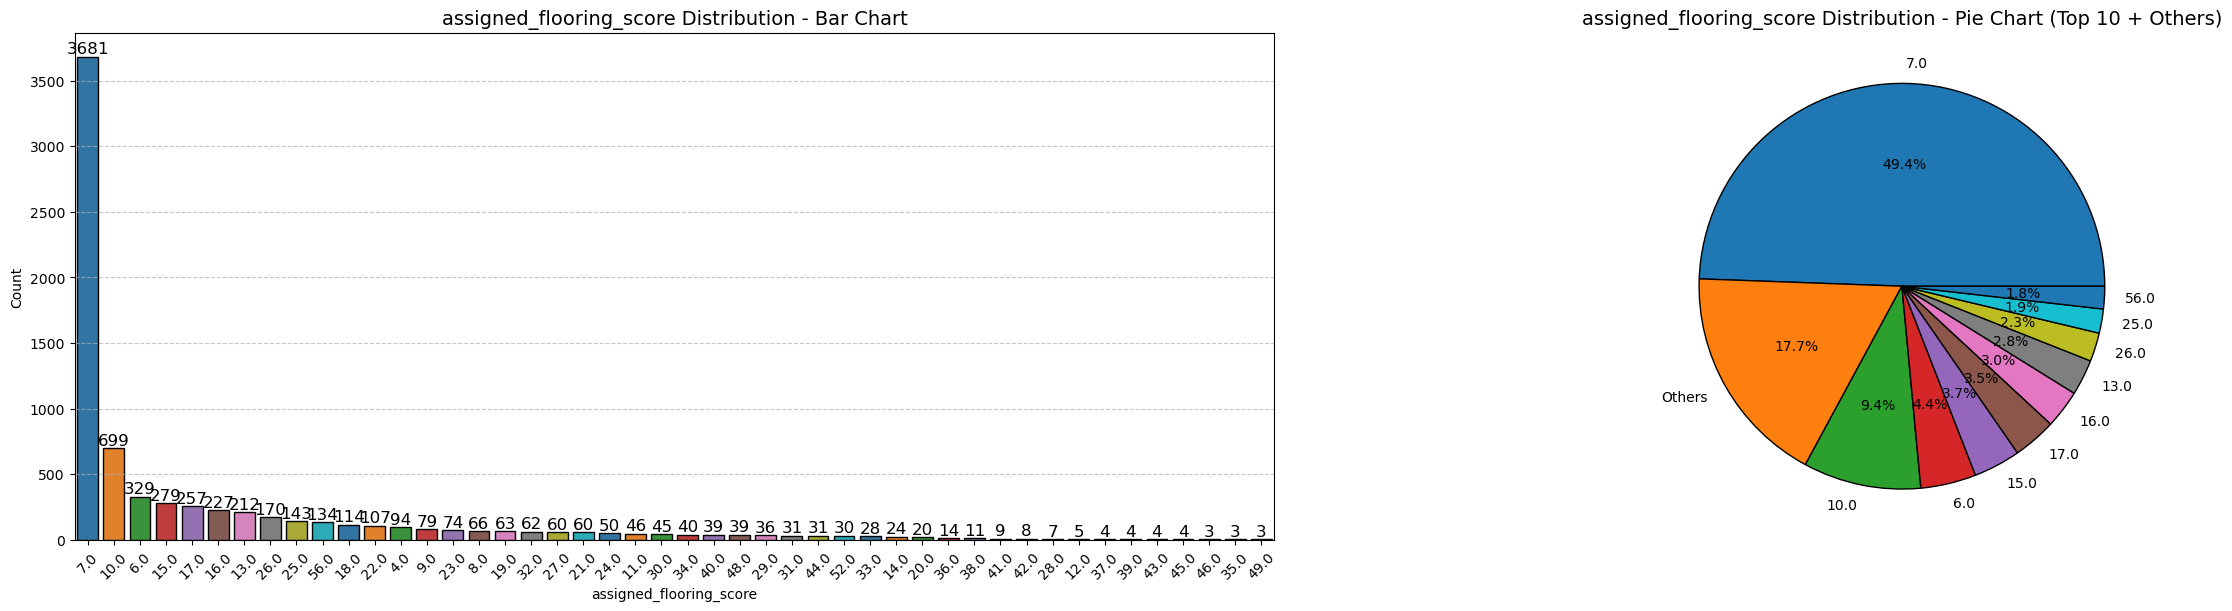

In [117]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'assigned_flooring_score', top_n=10) 

In [118]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'assigned_flooring_score',9, 0.90)

Top 9 cumulative values:
assigned_flooring_score
7.0     0.494227
10.0    0.588077
6.0     0.632250
15.0    0.669710
17.0    0.704216
16.0    0.734694
13.0    0.763158
26.0    0.785983
25.0    0.805183
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 17 Properties below 90.0% percentile: [4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 22.0, 23.0, 25.0, 26.0, 56.0]


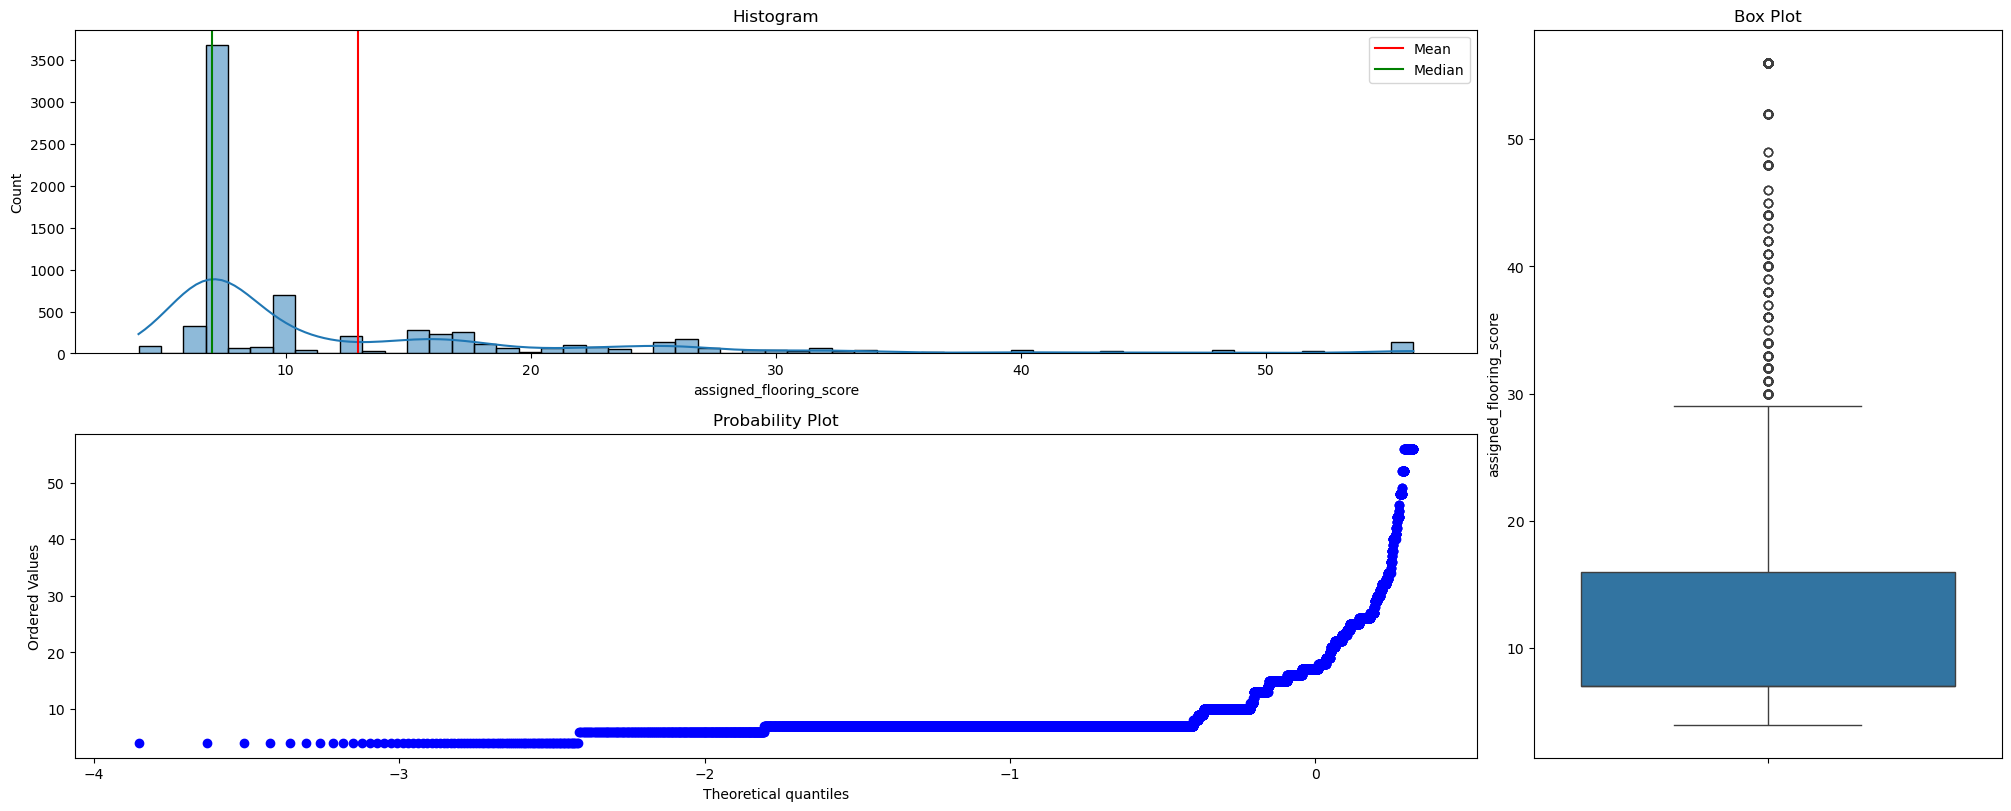

In [119]:
num_three_chart_plot(df, 'assigned_flooring_score')

In [120]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'assigned_flooring_score', quantiles_input)

skewness : 2.294472
kurtosis : 5.490865
--------------------------------------------------------------------
Q1 (25th percentile): 7.0000
Q3 (75th percentile): 16.0000
IQR: 9.0000
Lower bound: -6.5000
Upper bound: 29.5000
--------------------------------------------------------------------
10th percentile   7.0000
75th percentile   16.0000


# Univariate analysis on Categorical columns

In [121]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print("-" * 100)
print(f'Total categorical columns: {len(categorical_columns)}')

Index(['id', 'url', 'image', 'address', 'image_urls', 'construction',
       'overlooking', 'ownership', 'extra_rooms', 'builder', 'project_name',
       'furnish', 'property_type', 'status', 'facing', 'seller',
       'addressregion', 'price_category', 'amenities_cluster', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'room_type', 'flooring_cluster', 'place', 'extracted_location'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Total categorical columns: 29


# construction

In [122]:
# no of unique categories and value_counts
analyze_value_counts(df, 'construction', top_n=5)  

Unique Categories in 'construction': 7
--------------------------------------------------
construction
under construction    4558
less than 5 years     1509
new construction      1467
5 to 10 years         1406
10 to 15 years         945
Name: count, dtype: int64


In [147]:
# missing values
df['construction'].isna().sum()

1063

C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


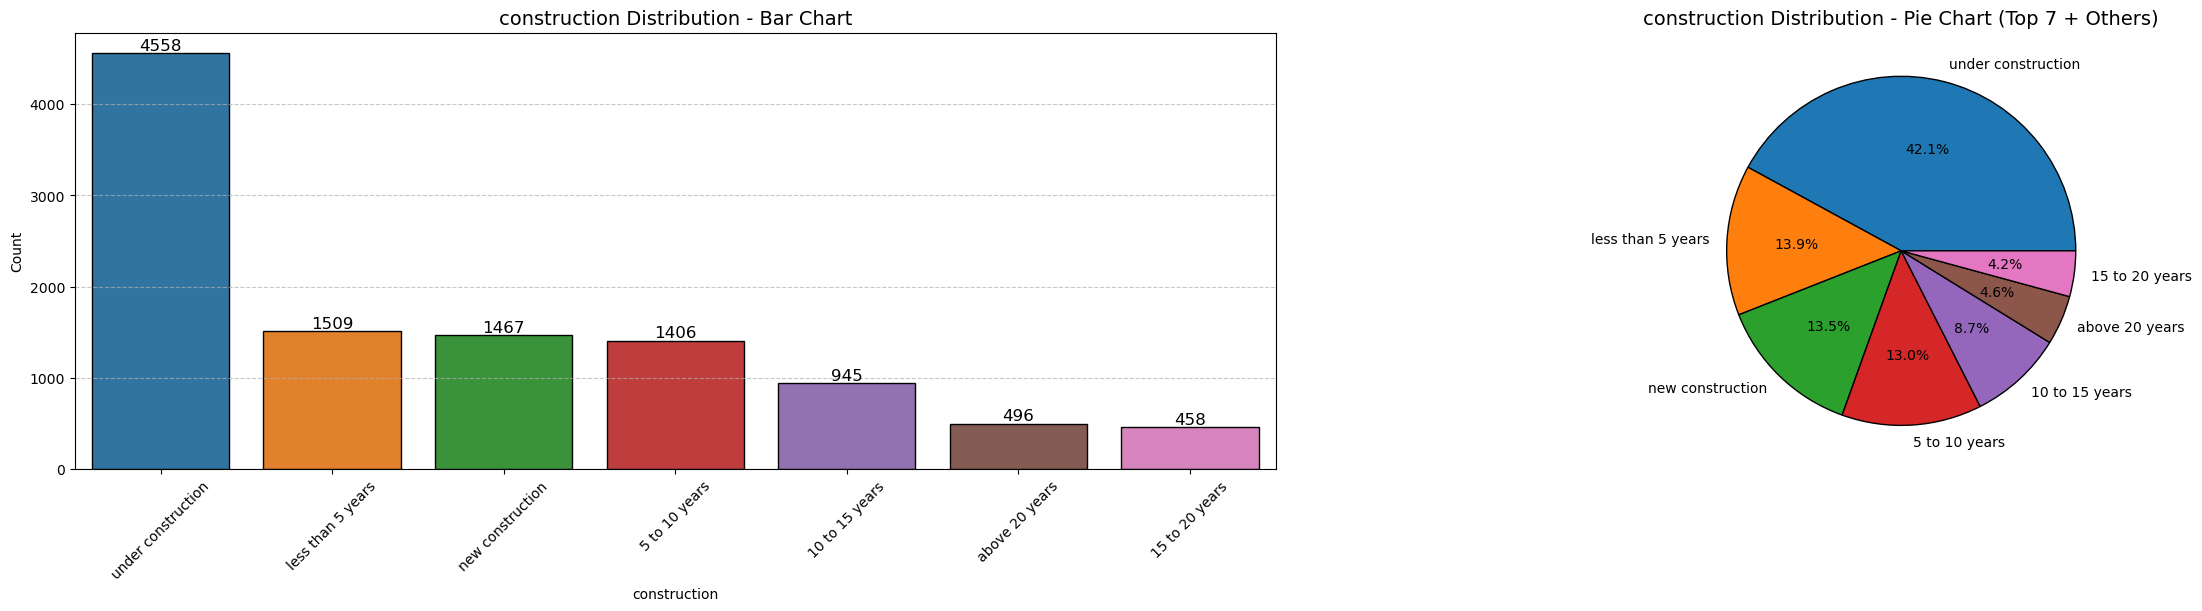

In [169]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'construction', top_n=7) 

In [125]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'construction',9, 0.90)

Top 9 cumulative values:
construction
under construction    0.420518
less than 5 years     0.559738
new construction      0.695083
5 to 10 years         0.824799
10 to 15 years        0.911985
above 20 years        0.957745
15 to 20 years        1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 5 Properties below 90.0% percentile: ['10 to 15 years', '5 to 10 years', 'less than 5 years', 'new construction', 'under construction']


# overlooking

In [126]:
# no of unique categories and value_counts
analyze_value_counts(df, 'overlooking', top_n=8)  

Unique Categories in 'overlooking': 7
--------------------------------------------------
overlooking
main road                       2244
garden/park, main road          1790
garden/park, main road, pool    1750
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64


In [146]:
# missing values
df['overlooking'].isna().sum()

3970

C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


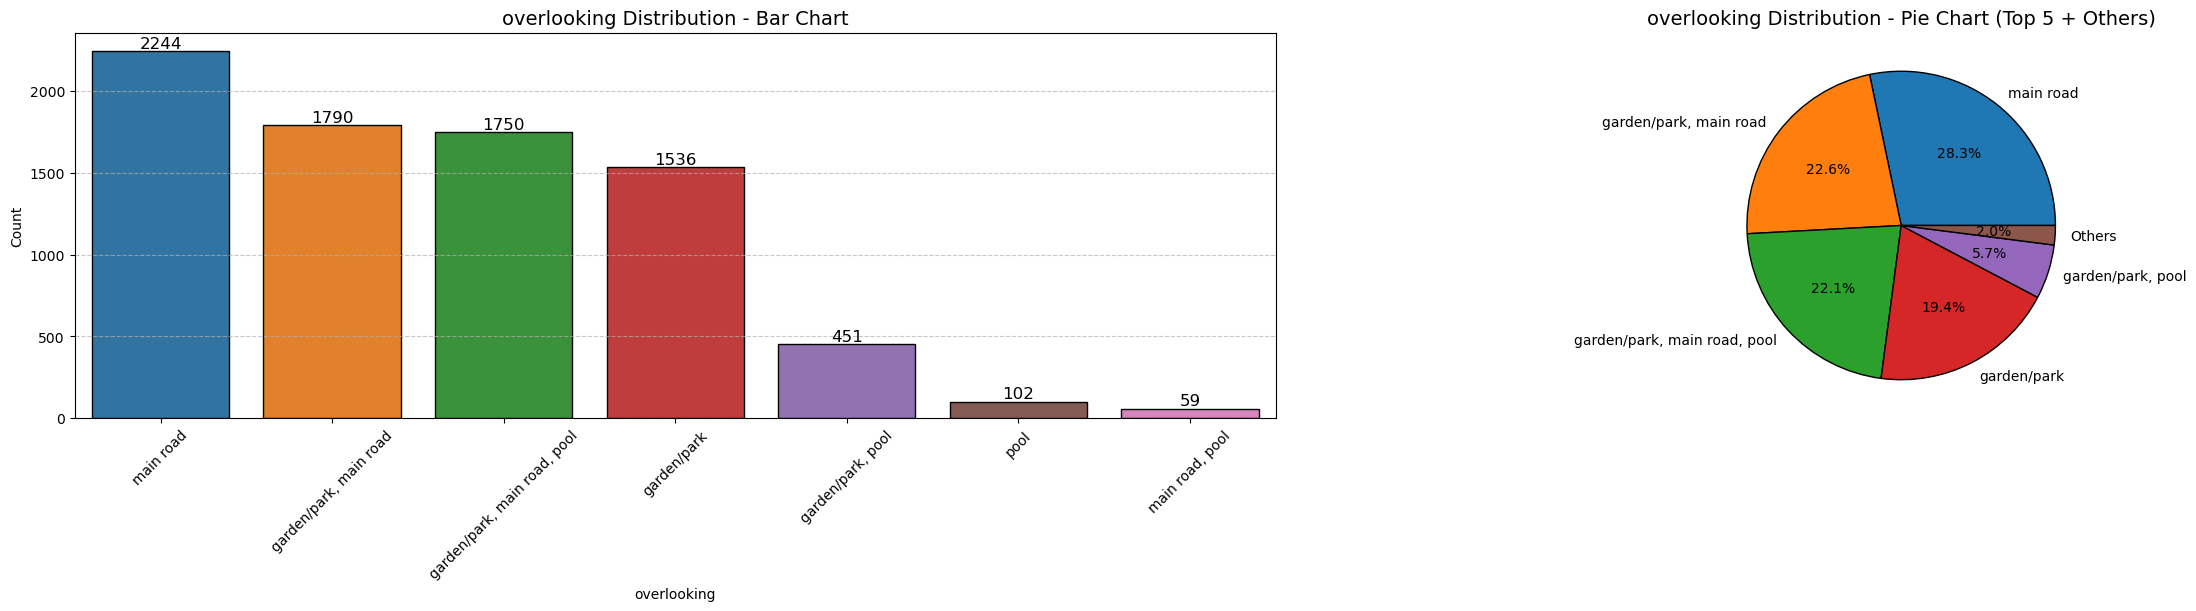

In [128]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'overlooking', top_n=5) 

In [129]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'overlooking',9, 0.90)

Top 9 cumulative values:
overlooking
main road                       0.282905
garden/park, main road          0.508573
garden/park, main road, pool    0.729198
garden/park                     0.922844
garden/park, pool               0.979702
pool                            0.992562
main road, pool                 1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 4 Properties below 90.0% percentile: ['garden/park', 'garden/park, main road', 'garden/park, main road, pool', 'main road']


# ownership

In [130]:
# no of unique categories and value_counts
analyze_value_counts(df, 'ownership', top_n=4)  

Unique Categories in 'ownership': 4
--------------------------------------------------
ownership
freehold                5923
co-operative society    2022
leasehold                317
power of attorney         28
Name: count, dtype: int64


In [145]:
# missing values
df['ownership'].isna().sum()

3612

C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


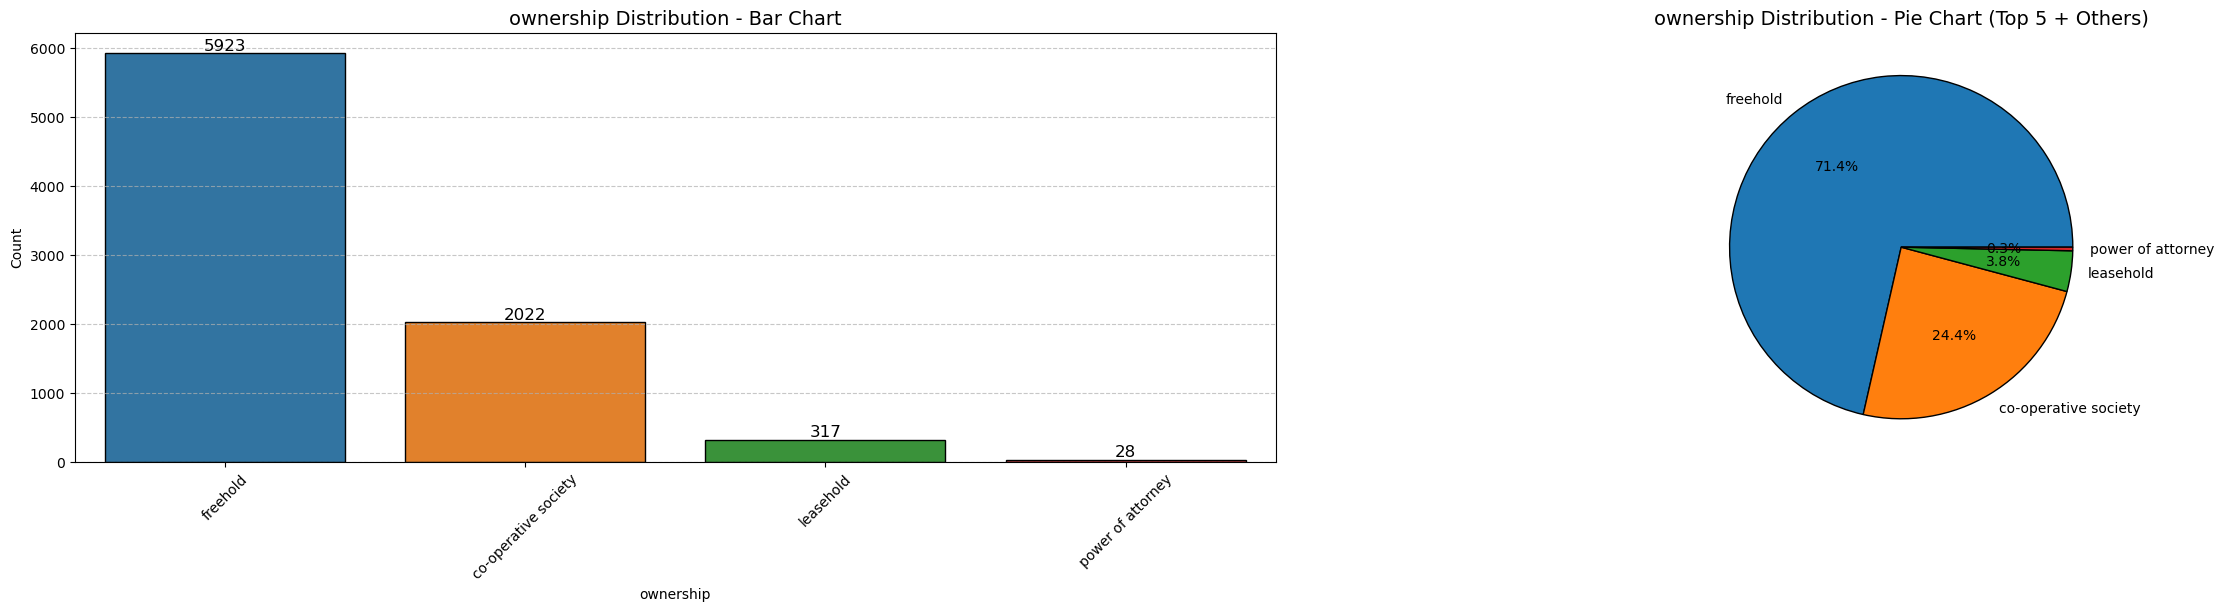

In [132]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'ownership', top_n=5) 

In [133]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'ownership',9, 0.90)

Top 9 cumulative values:
ownership
freehold                0.714475
co-operative society    0.958384
leasehold               0.996622
power of attorney       1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['co-operative society', 'freehold']


# extra_rooms

In [134]:
# no of unique categories and value_counts
analyze_value_counts(df, 'extra_rooms', top_n=16)  

Unique Categories in 'extra_rooms': 16
--------------------------------------------------
extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64


In [142]:
# missing values
df['extra_rooms'].isna().sum()

5304

C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


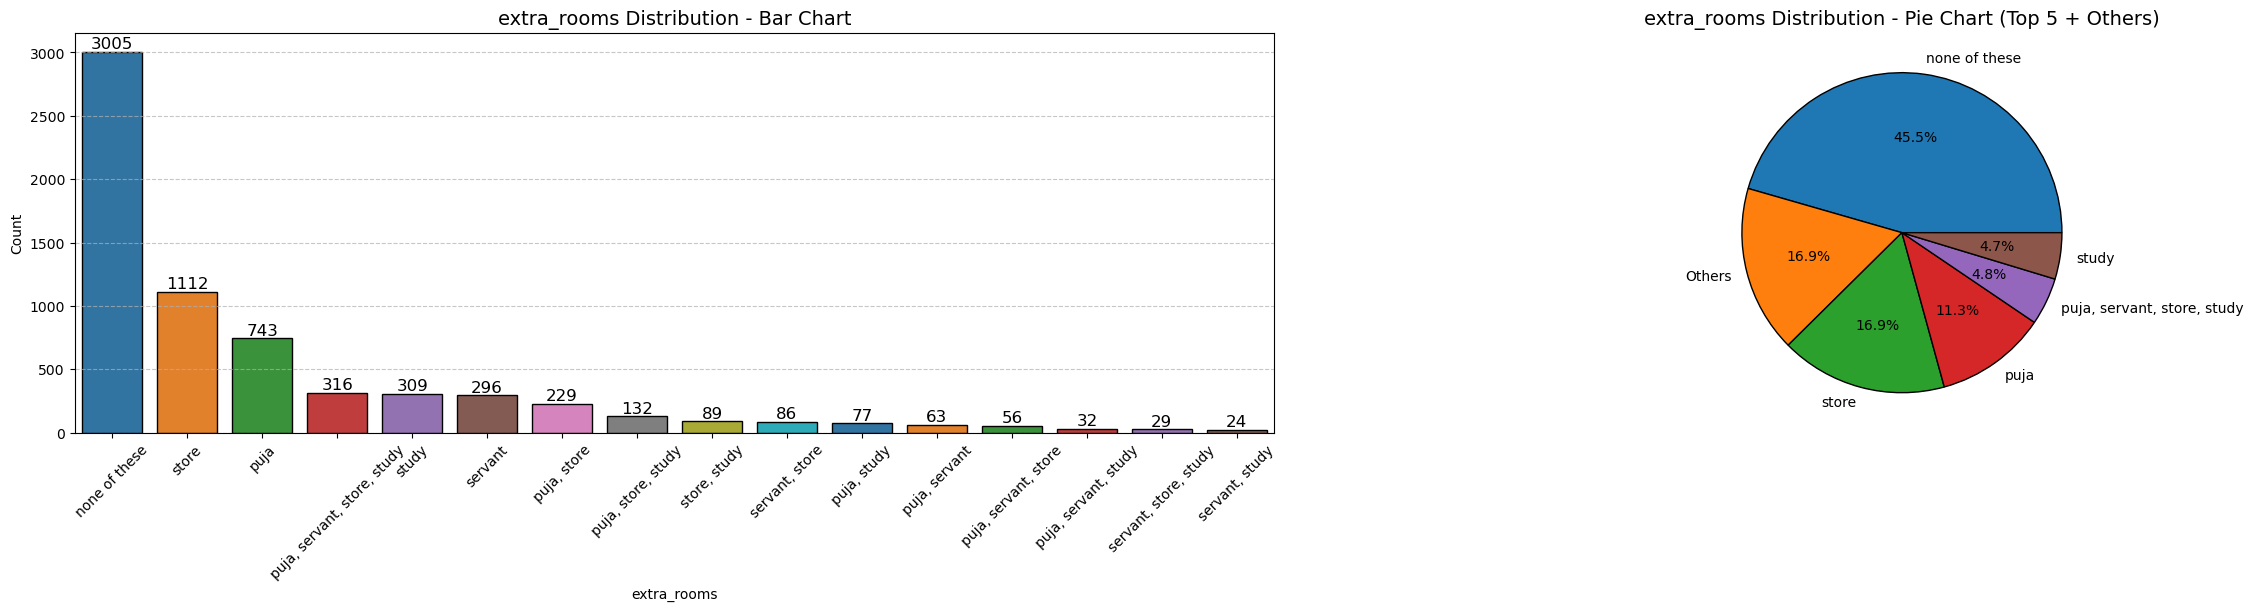

In [136]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'extra_rooms', top_n=5) 

In [137]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'extra_rooms',9, 0.90)

Top 9 cumulative values:
extra_rooms
none of these                  0.455441
store                          0.623977
puja                           0.736587
puja, servant, store, study    0.784480
study                          0.831313
servant                        0.876175
puja, store                    0.910882
puja, store, study             0.930888
store, study                   0.944377
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 7 Properties below 90.0% percentile: ['none of these', 'puja', 'puja, servant, store, study', 'puja, store', 'servant', 'store', 'study']


# builder

In [138]:
# no of unique categories and value_counts
analyze_value_counts(df, 'builder', top_n=8)  

Unique Categories in 'builder': 1146
--------------------------------------------------
builder
lodha group           468
godrej properties     277
rustomjee             241
piramal realty        227
oberoi realty ltd.    199
hiranandani group     171
l&t realty            153
runwal group          144
Name: count, dtype: int64


In [144]:
# missing values
df['builder'].isna().sum()

4281

C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\2492872788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],
C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\2492872788.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bar_data[feature], rotation=45, ha='right', fontsize=10)


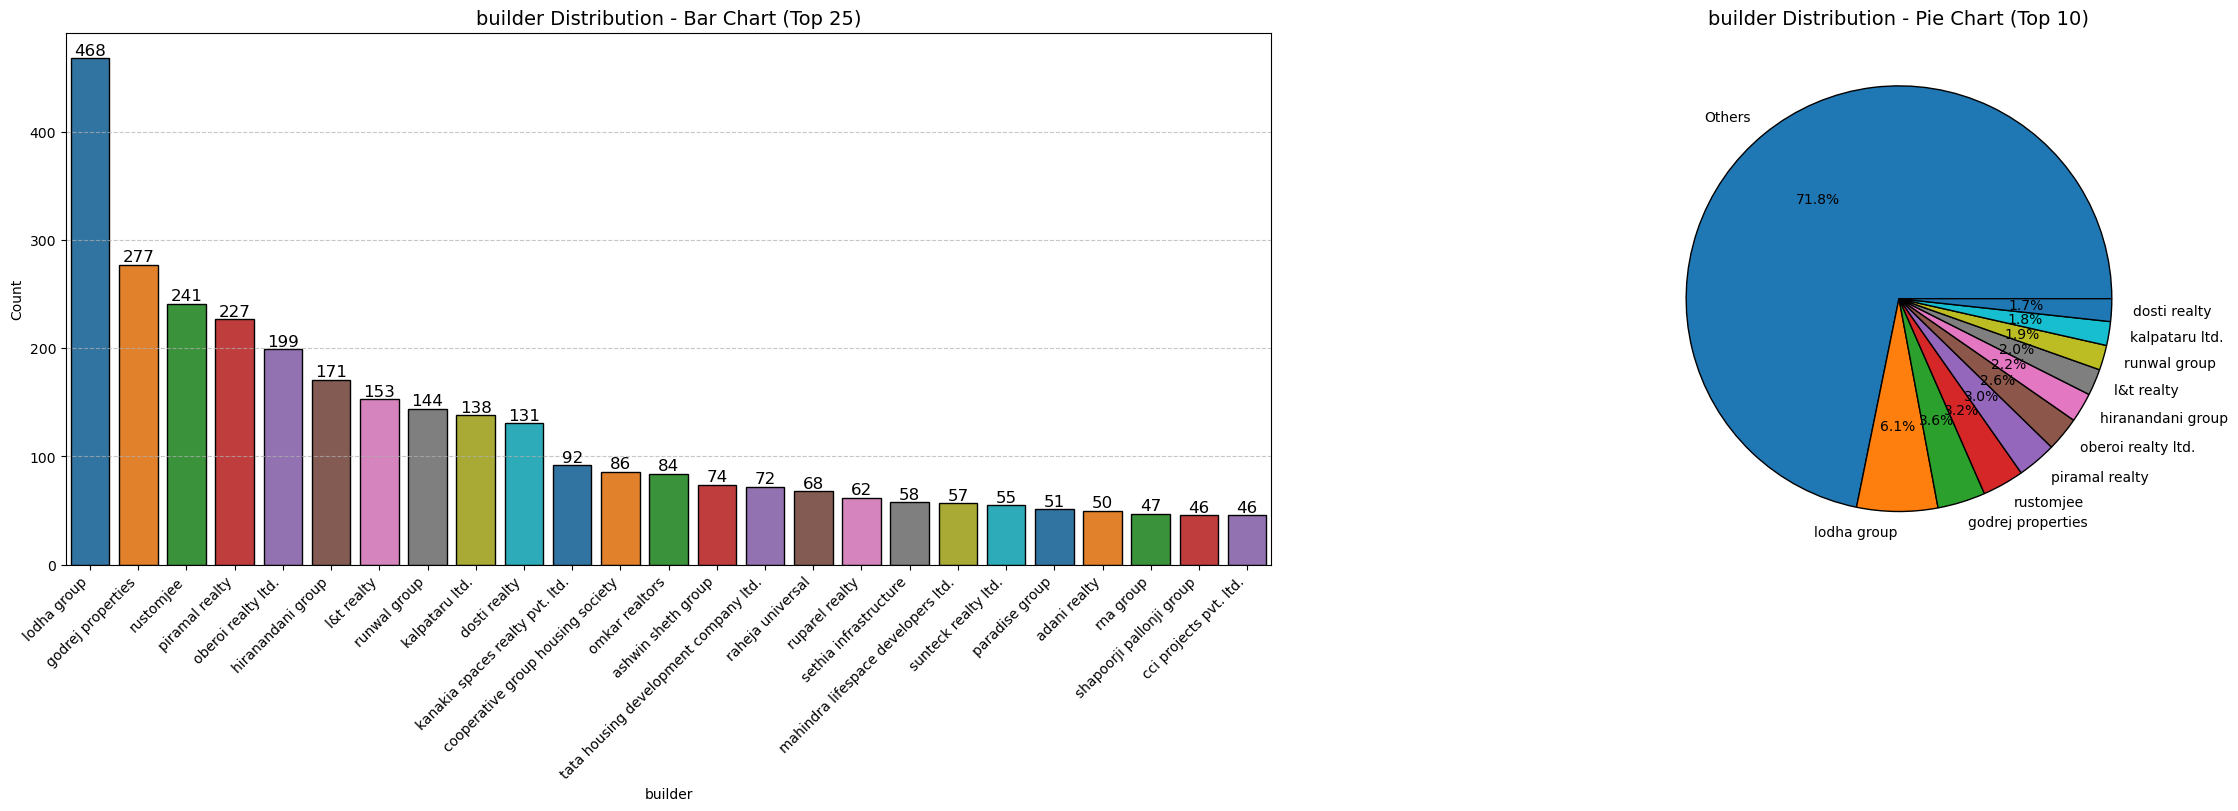

In [179]:
def bar_pie_chart_plot(df, feature, bar_top_n=None, pie_top_n=None):
    fig = plt.figure(constrained_layout=True, figsize=(25, 8))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (Apply bar_top_n filter if specified)
    bar_data = value_counts.reset_index()
    if bar_top_n is not None and bar_top_n < len(value_counts):
        bar_data = bar_data.iloc[:bar_top_n]
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others" only if needed)
    if pie_top_n is not None and pie_top_n < len(value_counts):
        top_values = value_counts.iloc[:pie_top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[pie_top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
        pie_data = pie_data.reset_index()
        pie_data.columns = [feature, 'count']
    else:
        pie_data = value_counts.reset_index()
        pie_data.columns = [feature, 'count']

    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title(f'{feature} Distribution - Bar Chart (Top {bar_top_n if bar_top_n else "All"})', fontsize=14)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticklabels(bar_data[feature], rotation=45, ha='right', fontsize=10)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {pie_top_n if pie_top_n else "All"})', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'})

    plt.show()
bar_pie_chart_plot(df, 'builder', bar_top_n=25, pie_top_n=10)


C:\Users\ABC\AppData\Local\Temp\ipykernel_10712\2419139285.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


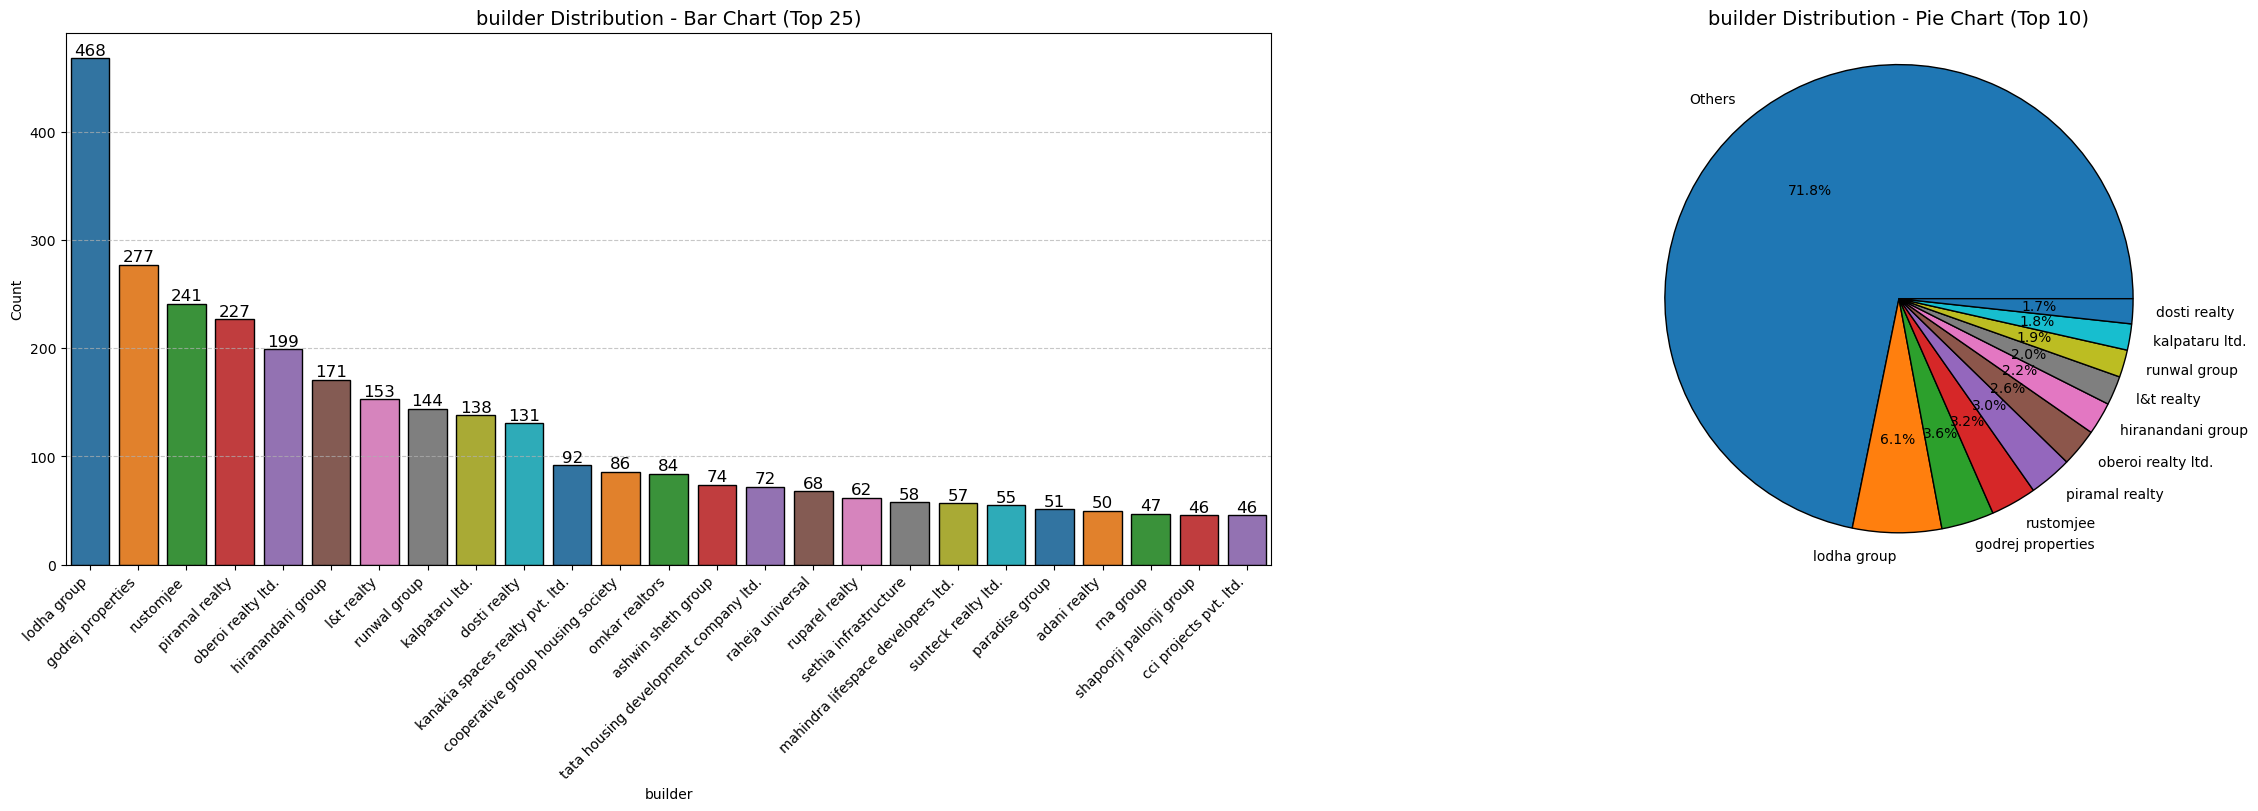

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

def bar_pie_chart_plot(df, feature, bar_top_n=None, pie_top_n=None):
    fig = plt.figure(constrained_layout=True, figsize=(25, 8))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (Apply bar_top_n filter if specified)
    bar_data = value_counts.reset_index()
    if bar_top_n is not None and bar_top_n < len(value_counts):
        bar_data = bar_data.iloc[:bar_top_n]
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others" only if needed)
    if pie_top_n is not None and pie_top_n < len(value_counts):
        top_values = value_counts.iloc[:pie_top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[pie_top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
        pie_data = pie_data.reset_index()
        pie_data.columns = [feature, 'count']
    else:
        pie_data = value_counts.reset_index()
        pie_data.columns = [feature, 'count']

    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title(f'{feature} Distribution - Bar Chart (Top {bar_top_n if bar_top_n else "All"})', fontsize=14)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticks(range(len(bar_data[feature])))  # Explicitly set tick positions
    ax1.set_xticklabels(bar_data[feature], rotation=45, ha='right', fontsize=10)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {pie_top_n if pie_top_n else "All"})', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'},radius=1.1)

    plt.show()

# Example usage
bar_pie_chart_plot(df, 'builder', bar_top_n=25, pie_top_n=10)

In [183]:
df['bath'].value_counts()

bath
2.0     6561
3.0     2485
1.0     1653
4.0      781
5.0      278
6.0       88
7.0       11
10.0       7
8.0        7
9.0        1
Name: count, dtype: int64